In [1]:

import os
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt
import random

from Source.RF_Env import RFBeamEnv
from Source.RL_Agent import RL_Agent


C:\PyCharm_Workspace\Drone_RL


In [3]:
def E_CDF(data):
    arr_data = np.sort(data)
    x_values = np.linspace(start=min(arr_data), stop=max(arr_data),num=len(arr_data))
    y_values = []
    
    for val in x_values:
        temp = arr_data[arr_data <= val]
        value = len(temp)/len(arr_data)
        y_values.append(value)
    
    return x_values, y_values

In [70]:
'''
#X_t = X_(t-1) + delta_p
def play_one_episode(agent, eps, eps_len, ue):
    
    #print("Estimated UE loc: {0}".format(obs))
    iters = 0
    total_rwd= []
    N = eps_len
    loc_rwds = []
    #done= False
    while (iters < N):#not done:
        #if done:
        #    break
        obs = agent.env.reset(ue)
        #ue_eps = eps*(1-iters/(N+10))
        action = agent.sample_action(obs, eps)
        #print("action: {0}".format(action))

        prev_obs = obs[:]

        obs, rwd = agent.env.step(action)
        agent.Update_Q(prev_obs, action, obs, rwd)
        print("posn_corr: {0}, rwd: {1}".format(action[-1], rwd))
        print("Rate observed: {0}, Exh Rate: {1}".format(agent.env.get_Rate(), agent.env.get_Exh_Rate()))
        loc_rwds.append(rwd)
        if(iters % 10 == 0):
            total_rwd.append(np.mean(loc_rwds))
            loc_rwds = []
            
        iters+=1

    return total_rwd
'''

In [286]:
'''
#X_t = X_(t-1) + delta_p

if __name__ == "__main__":
    
    #omega_vec = [30, 45, 60, 90]
    #Agent Parameters
    env = RFBeamEnv()
    alpha = 0.1
    gamma =  0.99
    eps = 0.2
    
    #UE parameters
    ue_s = [10,15,0]
    ue_v = 10
    ue_tdist = 90
    possible_ue_loc = [[x,ue_s[1],ue_s[2]] for x in range(ue_s[0]+ue_v,ue_s[0]+ue_tdist+1,ue_v)]
    rate_thr = 0.7
    
    agent = RL_Agent(env, alpha, gamma)
    agent.env.set_rate_threshold(rate_thr)
    M = len(possible_ue_loc) #no. of locations
    eps_len= 350
    ep_ndx = 0
    ep_rwds = []
    
    
    while (ep_ndx < M):
        #rnd_ndx = np.random.randint(0, len(possible_ue_loc))
        #ue_r = possible_ue_loc[rnd_ndx]
        ue_r = random.choice(possible_ue_loc)
        print("\nTraining position: {0}".format(ue_r))
        loc_rwd = play_one_episode(agent, eps, eps_len, ue_r)
        
        ep_rwds.append(loc_rwd)
                    
        ep_ndx += 1
    
    
    print("Training Done!!")
'''


Training position: [80, 15, 0]
[RF_Env] SNR: -86.91605583981513, rate: 4.6692204975468684e-06
posn_corr: [1], rwd: 0
Rate observed: 4.6692204975468684e-06, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 75.51119464609314, rate: 0.9000411756436313
posn_corr: [1], rwd: 1
Rate observed: 0.9000411756436313, Exh Rate: 0.7858029470322376
[RF_Env] SNR: -80.51323845232046, rate: 9.758309276575604e-06
posn_corr: [1], rwd: 0
Rate observed: 9.758309276575604e-06, Exh Rate: 0.7858029470322376
[RF_Env] SNR: -80.51323845232046, rate: 9.758309276575604e-06
posn_corr: [1], rwd: 0
Rate observed: 9.758309276575604e-06, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 53.80477263188333, rate: 0.6415143272699599
posn_corr: [2], rwd: 0
Rate observed: 0.6415143272699599, Exh Rate: 0.7858029470322376
[RF_Env] SNR: -2.8328119134796554, rate: 0.0562481817694211
posn_corr: [1], rwd: 0
Rate observed: 0.0562481817694211, Exh Rate: 0.7858029470322376
[RF_Env] SNR: -86.58426582944925, rate: 4.8510248857595355e-06
posn_corr:

[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [0], rwd: 0
Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [0], rwd: 0
Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 66.59229099345067, rate: 0.7937671660899968
posn_corr: [0], rwd: 1
Rate observed: 0.7937671660899968, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [0], rwd: 0
Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 59.94754020567541, rate: 0.7146235104893878
posn_corr: [0], rwd: 1
Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 59.732722923988106, rate: 0.7120656919509885
posn_corr: [2], rwd: 1
Rate observed: 0.7120656919509885, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 66.59229099345067, rate: 0.7937671660899968
posn_corr: [0], rwd: 1
Rate observed: 0.7937671660899968, Exh Rate: 

[RF_Env] SNR: 44.73806202147787, rate: 0.5338347226227154
posn_corr: [-2], rwd: 0
Rate observed: 0.5338347226227154, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 47.6461727646286, rate: 0.5683268497947092
posn_corr: [2], rwd: 0
Rate observed: 0.5683268497947092, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 48.215596689419144, rate: 0.5750867266039354
posn_corr: [0], rwd: 0
Rate observed: 0.5750867266039354, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [0], rwd: 0
Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 59.94754020567541, rate: 0.7146235104893878
posn_corr: [0], rwd: 1
Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 54.637968134881845, rate: 0.651425963440065
posn_corr: [-2], rwd: 0
Rate observed: 0.651425963440065, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [0], rwd: 0
Rate observed: 0.5616693555453631, Exh Rate: 0

Rate observed: 0.5750867266039354, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 48.215596689419144, rate: 0.5750867266039354
posn_corr: [0], rwd: 0
Rate observed: 0.5750867266039354, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 48.215596689419144, rate: 0.5750867266039354
posn_corr: [0], rwd: 0
Rate observed: 0.5750867266039354, Exh Rate: 0.7858029470322376
[RF_Env] SNR: -8.572049280242336, rate: 0.03279796299825551
posn_corr: [1], rwd: 0
Rate observed: 0.03279796299825551, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 59.94754020567541, rate: 0.7146235104893878
posn_corr: [0], rwd: 1
Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [0], rwd: 0
Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 59.94754020567541, rate: 0.7146235104893878
posn_corr: [0], rwd: 1
Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 48.215596689419144, rate: 0.5750867266039354
p

[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [0], rwd: 0
Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 48.215596689419144, rate: 0.5750867266039354
posn_corr: [0], rwd: 0
Rate observed: 0.5750867266039354, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 59.94754020567541, rate: 0.7146235104893878
posn_corr: [0], rwd: 1
Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 48.215596689419144, rate: 0.5750867266039354
posn_corr: [0], rwd: 0
Rate observed: 0.5750867266039354, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 59.94754020567541, rate: 0.7146235104893878
posn_corr: [0], rwd: 1
Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: -80.84502846268646, rate: 9.39260037596356e-06
posn_corr: [1], rwd: 0
Rate observed: 9.39260037596356e-06, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 48.215596689419144, rate: 0.5750867266039354
posn_corr: [0], rwd: 0
Rate observed: 0.5750867266039354, Exh R

[RF_Env] SNR: 44.54547769995668, rate: 0.5315526686070786
posn_corr: [-2], rwd: 0
Rate observed: 0.5315526686070786, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 53.73456021566197, rate: 0.6406791711440726
posn_corr: [-2], rwd: 0
Rate observed: 0.6406791711440726, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 79.00494161731996, rate: 0.9416776706264622
posn_corr: [2], rwd: 1
Rate observed: 0.9416776706264622, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 53.73456021566197, rate: 0.6406791711440726
posn_corr: [-2], rwd: 0
Rate observed: 0.6406791711440726, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 44.54547769995668, rate: 0.5315526686070786
posn_corr: [-2], rwd: 0
Rate observed: 0.5315526686070786, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.02767755995669, rate: 0.7870407481103189
posn_corr: [-2], rwd: 1
Rate observed: 0.7870407481103189, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 53.97427989410917, rate: 0.6435306229527217
posn_corr: [1], rwd: 0
Rate observed: 0.6435306229527217, Exh Rate:

Rate observed: 0.6186466650322442, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 44.98064349353788, rate: 0.5367096388264645
posn_corr: [2], rwd: 0
Rate observed: 0.5367096388264645, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 54.696157970309415, rate: 0.6521182534356591
posn_corr: [0], rwd: 0
Rate observed: 0.6521182534356591, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_cor

Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 61.99279255542891, rate: 0.7389792008019795
posn_corr: [2], rwd: 1
Rate observed: 0.7389792008019795, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 53.97427989410917, rate: 0.6435306229527217
posn_corr: [1], rwd: 0
Rate observed: 0.6435306229527217, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr

Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: 0
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr:

[RF_Env] SNR: 44.8730783230874, rate: 0.5354347908331244
posn_corr: [-2], rwd: 0
Rate observed: 0.5354347908331244, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 54.05479745606026, rate: 0.6444884102067966
posn_corr: [-2], rwd: 0
Rate observed: 0.6444884102067966, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 5.124031637881642, rate: 0.10673666013747732
posn_corr: [0], rwd: 0
Rate observed: 0.10673666013747732, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 54.05479745606026, rate: 0.6444884102067966
posn_corr: [-2], rwd: 0
Rate observed: 0.6444884102067966, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 28.86322153094987, rate: 0.3476889174671023
posn_corr: [-1], rwd: 0
Rate observed: 0.3476889174671023, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 48.22010096193705, rate: 0.575140205748516
posn_corr: [-2], rwd: 0
Rate observed: 0.575140205748516, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 56.55851951050754, rate: 0.6742791535069336
posn_corr: [1], rwd: 0
Rate observed: 0.6742791535069336, Exh Rate: 

[RF_Env] SNR: -10.724384615158025, rate: 0.02643674140959858
posn_corr: [2], rwd: 0
Rate observed: 0.02643674140959858, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 42.74256422086762, rate: 0.5102041859670062
posn_corr: [0], rwd: 0
Rate observed: 0.5102041859670062, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 42.74256422086762, rate: 0.5102041859670062
posn_corr: [0], rwd: 0
Rate observed: 0.5102041859670062, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 42.74256422086762, rate: 0.5102041859670062
posn_corr: [0], rwd: 0
Rate observed: 0.5102041859670062, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 77.27898700458282, rate: 0.921108434691068
posn_corr: [0], rwd: 1
Rate observed: 0.921108434691068, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 39.660454421596825, rate: 0.4737870412139285
posn_corr: [0], rwd: 0
Rate observed: 0.4737870412139285, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 77.27898700458282, rate: 0.921108434691068
posn_corr: [0], rwd: 1
Rate observed: 0.921108434691068, Exh Rate: 0.9

[RF_Env] SNR: 39.660454421596825, rate: 0.4737870412139285
posn_corr: [0], rwd: 0
Rate observed: 0.4737870412139285, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 77.27898700458282, rate: 0.921108434691068
posn_corr: [0], rwd: 1
Rate observed: 0.921108434691068, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 42.74256422086762, rate: 0.5102041859670062
posn_corr: [0], rwd: 0
Rate observed: 0.5102041859670062, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 39.660454421596825, rate: 0.4737870412139285
posn_corr: [0], rwd: 0
Rate observed: 0.4737870412139285, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 71.47141404460629, rate: 0.8519009921035281
posn_corr: [-1], rwd: 1
Rate observed: 0.8519009921035281, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 35.10848529405223, rate: 0.42026315651746676
posn_corr: [0], rwd: 0
Rate observed: 0.42026315651746676, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 39.660454421596825, rate: 0.4737870412139285
posn_corr: [0], rwd: 0
Rate observed: 0.4737870412139285, Exh Rate: 

[RF_Env] SNR: 61.575658435200666, rate: 0.7340113923991292
posn_corr: [1], rwd: 1
Rate observed: 0.7340113923991292, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 43.92714338865014, rate: 0.5242276801960437
posn_corr: [1], rwd: 0
Rate observed: 0.5242276801960437, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 56.39270569827896, rate: 0.6723057667430477
posn_corr: [1], rwd: 0
Rate observed: 0.6723057667430477, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 56.39270569827896, rate: 0.6723057667430477
posn_corr: [1], rwd: 0
Rate observed: 0.6723057667430477, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 56.39270569827896, rate: 0.6723057667430477
posn_corr: [1], rwd: 0
Rate observed: 0.6723057667430477, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 61.575658435200666, rate: 0.7340113923991292
posn_corr: [1], rwd: 1
Rate observed: 0.7340113923991292, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 56.39270569827896, rate: 0.6723057667430477
posn_corr: [1], rwd: 0
Rate observed: 0.6723057667430477, Exh Rate: 0.

[RF_Env] SNR: 42.421923681466886, rate: 0.5064106275272061
posn_corr: [0], rwd: 0
Rate observed: 0.5064106275272061, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 43.92714338865014, rate: 0.5242276801960437
posn_corr: [1], rwd: 0
Rate observed: 0.5242276801960437, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [0], rwd: 1
Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [0], rwd: 1
Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 42.421923681466886, rate: 0.5064106275272061
posn_corr: [0], rwd: 0
Rate observed: 0.5064106275272061, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 42.421923681466886, rate: 0.5064106275272061
posn_corr: [0], rwd: 0
Rate observed: 0.5064106275272061, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [0], rwd: 1
Rate observed: 0.7942182201571905, Exh Rate: 0

Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [0], rwd: 1
Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 44.59326297119733, rate: 0.5321188791056859
posn_corr: [0], rwd: 0
Rate observed: 0.5321188791056859, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 10.285806865314296, rate: 0.15023539239133074
posn_corr: [-1], rwd: 0
Rate observed: 0.15023539239133074, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 44.59326297119733, rate: 0.5321188791056859
posn_corr: [0], rwd: 0
Rate observed: 0.5321188791056859, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [0], rwd: 1
Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [0], rwd: 1
Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 53.40010522562511, rate: 0.6367011191880748
posn

Rate observed: 0.6367011191880748, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 44.59326297119733, rate: 0.5321188791056859
posn_corr: [0], rwd: 0
Rate observed: 0.5321188791056859, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 53.40010522562511, rate: 0.6367011191880748
posn_corr: [0], rwd: 0
Rate observed: 0.6367011191880748, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 53.40010522562511, rate: 0.6367011191880748
posn_corr: [0], rwd: 0
Rate observed: 0.6367011191880748, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 72.05565342294376, rate: 0.858862789502607
posn_corr: [-1], rwd: 1
Rate observed: 0.858862789502607, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 44.59326297119733, rate: 0.5321188791056859
posn_corr: [0], rwd: 0
Rate observed: 0.5321188791056859, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 44.59326297119733, rate: 0.5321188791056859
posn_corr: [0], rwd: 0
Rate observed: 0.5321188791056859, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 61.575658435200666, rate: 0.7340113923991292
posn_cor

[RF_Env] SNR: 53.40010522562511, rate: 0.6367011191880748
posn_corr: [0], rwd: 0
Rate observed: 0.6367011191880748, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [0], rwd: 1
Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [0], rwd: 1
Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 53.40010522562511, rate: 0.6367011191880748
posn_corr: [0], rwd: 0
Rate observed: 0.6367011191880748, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 53.40010522562511, rate: 0.6367011191880748
posn_corr: [0], rwd: 0
Rate observed: 0.6367011191880748, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 40.4877899748781, rate: 0.48355126973941365
posn_corr: [-2], rwd: 0
Rate observed: 0.48355126973941365, Exh Rate: 0.7862494754733391
[RF_Env] SNR: 53.40010522562511, rate: 0.6367011191880748
posn_corr: [0], rwd: 0
Rate observed: 0.6367011191880748, Exh Rate: 0.

[RF_Env] SNR: 8.216247963582376, rate: 0.1318968449523135
posn_corr: [-1], rwd: 0
Rate observed: 0.1318968449523135, Exh Rate: 0.8825198901551439
[RF_Env] SNR: -71.10537472205223, rate: 2.8822243138380966e-05
posn_corr: [-1], rwd: 0
Rate observed: 2.8822243138380966e-05, Exh Rate: 0.8825198901551439
[RF_Env] SNR: -77.24013481005471, rate: 1.4223955787873959e-05
posn_corr: [-1], rwd: 0
Rate observed: 1.4223955787873959e-05, Exh Rate: 0.8825198901551439
[RF_Env] SNR: -77.00547388920941, rate: 1.4613445451634037e-05
posn_corr: [-1], rwd: 0
Rate observed: 1.4613445451634037e-05, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 8.216247963582376, rate: 0.1318968449523135
posn_corr: [-1], rwd: 0
Rate observed: 0.1318968449523135, Exh Rate: 0.8825198901551439
[RF_Env] SNR: -70.87071380120688, rate: 2.9611415494218443e-05
posn_corr: [-1], rwd: 0
Rate observed: 2.9611415494218443e-05, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 57.76176593442973, rate: 0.6886008652613169
posn_corr: [0], rwd: 0
Rate ob

Rate observed: 0.6967520917236385, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 72.76862237816533, rate: 0.8673586863458208
posn_corr: [-2], rwd: 1
Rate observed: 0.8673586863458208, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 58.87022818473184, rate: 0.7017966834022481
posn_corr: [-2], rwd: 1
Rate observed: 0.7017966834022481, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 58.44649746942052, rate: 0.6967520917236385
posn_corr: [-2], rwd: 0
Rate observed: 0.6967520917236385, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 58.87022818473184, rate: 0.7017966834022481
posn_corr: [-2], rwd: 1
Rate observed: 0.7017966834022481, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 58.87022818473184, rate: 0.7017966834022481
posn_corr: [-2], rwd: 1
Rate observed: 0.7017966834022481, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 55.401966743174995, rate: 0.660515989777056
posn_corr: [0], rwd: 0
Rate observed: 0.660515989777056, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 58.44649746942052, rate: 0.6967520917236385
posn

[RF_Env] SNR: 75.26054039089878, rate: 0.8970541161429696
posn_corr: [-2], rwd: 1
Rate observed: 0.8970541161429696, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 75.26054039089878, rate: 0.8970541161429696
posn_corr: [-2], rwd: 1
Rate observed: 0.8970541161429696, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 72.76862237816533, rate: 0.8673586863458208
posn_corr: [-2], rwd: 1
Rate observed: 0.8673586863458208, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 75.26054039089878, rate: 0.8970541161429696
posn_corr: [-2], rwd: 1
Rate observed: 0.8970541161429696, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 58.44649746942052, rate: 0.6967520917236385
posn_corr: [-2], rwd: 0
Rate observed: 0.6967520917236385, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 75.26054039089878, rate: 0.8970541161429696
posn_corr: [-2], rwd: 1
Rate observed: 0.8970541161429696, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 75.26054039089878, rate: 0.8970541161429696
posn_corr: [-2], rwd: 1
Rate observed: 0.8970541161429696, Exh Rat

[RF_Env] SNR: 75.26054039089878, rate: 0.8970541161429696
posn_corr: [-2], rwd: 1
Rate observed: 0.8970541161429696, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 72.76862237816533, rate: 0.8673586863458208
posn_corr: [-2], rwd: 1
Rate observed: 0.8673586863458208, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 85.5628856733457, rate: 1.0198361649646357
posn_corr: [1], rwd: 1
Rate observed: 1.0198361649646357, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 75.26054039089878, rate: 0.8970541161429696
posn_corr: [-2], rwd: 1
Rate observed: 0.8970541161429696, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 58.44649746942052, rate: 0.6967520917236385
posn_corr: [-2], rwd: 0
Rate observed: 0.6967520917236385, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 46.67142420186299, rate: 0.5567595054072767
posn_corr: [1], rwd: 0
Rate observed: 0.5567595054072767, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 58.44649746942052, rate: 0.6967520917236385
posn_corr: [-2], rwd: 0
Rate observed: 0.6967520917236385, Exh Rate: 

Rate observed: 0.42213397161016064, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 55.28927763236731, rate: 0.6591751308966656
posn_corr: [0], rwd: 0
Rate observed: 0.6591751308966656, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 36.867488583673286, rate: 0.4409007745938576
posn_corr: [1], rwd: 0
Rate observed: 0.4409007745938576, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 35.26817636090471, rate: 0.42213397161016064
posn_corr: [1], rwd: 0
Rate observed: 0.42213397161016064, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 73.90220286244923, rate: 0.8808670089146204
posn_corr: [-1], rwd: 1
Rate observed: 0.8808670089146204, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 9.955450567306482, rate: 0.14723393359907117
posn_corr: [-1], rwd: 0
Rate observed: 0.14723393359907117, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -52.64811458346939, rate: 0.0002410712945468886
posn_corr: [-1], rwd: 0
Rate observed: 0.0002410712945468886, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -59.64898843041337, rate: 0.00010774

Rate observed: 0.15336391314537565, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 9.955450567306482, rate: 0.14723393359907117
posn_corr: [-1], rwd: 0
Rate observed: 0.14723393359907117, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -53.31970815565279, rate: 0.0002231533536274243
posn_corr: [-1], rwd: 0
Rate observed: 0.0002231533536274243, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 55.28927763236731, rate: 0.6591751308966656
posn_corr: [0], rwd: 0
Rate observed: 0.6591751308966656, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 73.90220286244923, rate: 0.8808670089146204
posn_corr: [-1], rwd: 1
Rate observed: 0.8808670089146204, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 17.873277032261004, rate: 0.2254788917881064
posn_corr: [2], rwd: 0
Rate observed: 0.2254788917881064, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -58.977394858229985, rate: 0.00011639734181662721
posn_corr: [-1], rwd: 0
Rate observed: 0.00011639734181662721, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 9.955450567306482, rate: 0.

[RF_Env] SNR: 10.627044139489922, rate: 0.15336391314537565
posn_corr: [-1], rwd: 0
Rate observed: 0.15336391314537565, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -48.60850968587005, rate: 0.00038355419755269196
posn_corr: [2], rwd: 0
Rate observed: 0.00038355419755269196, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 4.2977638647293395, rate: 0.10050916883402149
posn_corr: [-1], rwd: 0
Rate observed: 0.10050916883402149, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -53.31970815565279, rate: 0.0002231533536274243
posn_corr: [-1], rwd: 0
Rate observed: 0.0002231533536274243, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -58.977394858229985, rate: 0.00011639734181662721
posn_corr: [-1], rwd: 0
Rate observed: 0.00011639734181662721, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 4.2977638647293395, rate: 0.10050916883402149
posn_corr: [-1], rwd: 0
Rate observed: 0.10050916883402149, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 55.28927763236731, rate: 0.6591751308966656
posn_corr: [0], rwd: 0
Rate obse

[RF_Env] SNR: 68.33056963735466, rate: 0.8144770580510573
posn_corr: [0], rwd: 1
Rate observed: 0.8144770580510573, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 57.509868811647266, rate: 0.6856024203975232
posn_corr: [-2], rwd: 0
Rate observed: 0.6856024203975232, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 55.28927763236731, rate: 0.6591751308966656
posn_corr: [0], rwd: 0
Rate observed: 0.6591751308966656, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 68.33056963735466, rate: 0.8144770580510573
posn_corr: [0], rwd: 1
Rate observed: 0.8144770580510573, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 44.263180704568974, rate: 0.5282080925957894
posn_corr: [0], rwd: 0
Rate observed: 0.5282080925957894, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 46.403118112661126, rate: 0.5535765405449004
posn_corr: [0], rwd: 0
Rate observed: 0.5535765405449004, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 55.28927763236731, rate: 0.6591751308966656
posn_corr: [0], rwd: 0
Rate observed: 0.6591751308966656, Exh Rate: 

Rate observed: 0.6234336872796634, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 51.44971125688628, rate: 0.6135098101630342
posn_corr: [1], rwd: 0
Rate observed: 0.6135098101630342, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 69.79480934945566, rate: 0.8319232924807759
posn_corr: [1], rwd: 1
Rate observed: 0.8319232924807759, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 52.284440157124045, rate: 0.6234336872796634
posn_corr: [1], rwd: 0
Rate observed: 0.6234336872796634, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_co

[RF_Env] SNR: 49.92137598732408, rate: 0.5953466090474934
posn_corr: [0], rwd: 0
Rate observed: 0.5953466090474934, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 79.36525414102063, rate: 0.9459717920190733
posn_corr: [2], rwd: 1
Rate observed: 0.9459717920190733, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 51.44971125688628, rate: 0.6135098101630342
posn_corr: [1], rwd: 0
Rate observed: 0.6135098101630342, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 52.284440157124045, rate: 0.6234336872796634
posn_corr: [1], rwd: 0
Rate observed: 0.6234336872796634, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 52.284440157124045, rate: 0.6234336872796634
posn_corr: [1], rwd: 0
Rate observed: 0.6234336872796634, Exh Rate: 0.

Rate observed: 0.019869480779841204, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 52.284440157124045, rate: 0.6234336872796634
posn_corr: [1], rwd: 0
Rate observed: 0.6234336872796634, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 52.284440157124045, rate: 0.6234336872796634
posn_corr: [1], rwd: 0
Rate observed: 0.6234336872796634, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 52.284440157124045, rate: 0.6234336872796634
posn_corr: [1], rwd: 0
Rate observed: 0.6234336872796634, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 51.44971125688628, rate: 0.6135098101630342
posn_corr: [1], rwd: 0
Rate observed: 0.6135098101630342, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 7.818804031241657, rate: 0.12850666487356605
posn_corr: [2], rwd: 0
Rate observed: 0.12850666487356605, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 69.79480934945566, rate: 0.8319232924807759
posn_corr: [1], rwd: 1
Rate observed: 0.8319232924807759, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 52.284440157124045, rate: 0.6234336872796634


Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 51.44971125688628, rate: 0.6135098101630342
posn_corr: [1], rwd: 0
Rate observed: 0.6135098101630342, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 64.89513350579001, rate: 0.7735490666975148
posn_corr: [1], rwd: 1
Rate observed: 0.7735490666975148, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 51.44971125688628, rate: 0.6135098101630342
posn_corr: [1], rwd: 0
Rate observed: 0.6135098101630342, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 52.284440157124045, rate: 0.6234336872796634
posn_co

Rate observed: 0.8011239747460549, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.49366600608556, rate: 0.9832562088614634
posn_corr: [-2], rwd: 1
Rate observed: 0.9832562088614634, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.56588687030515, rate: 0.9841169506498281
posn_corr: [-2], rwd: 1
Rate observed: 0.9841169506498281, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.63810773452475, rate: 0.9849776929707879
posn_corr: [-2], rwd: 1
Rate observed: 0.9849776929707879, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.29998935867886, rate: 0.8021984875027474
posn_corr: [-2], rwd: 1
Rate observed: 0.8021984875027474, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.29998935867886, rate: 0.8021984875027474
posn_corr: [-2], rwd: 1
Rate observed: 0.8021984875027474, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.29998935867886, rate: 0.8021984875027474
posn_corr: [-2], rwd: 1
Rate observed: 0.8021984875027474, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.22776849445927, rate: 0.8013380542302821
po

Rate observed: 0.9849776929707879, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.49366600608556, rate: 0.9832562088614634
posn_corr: [-2], rwd: 1
Rate observed: 0.9832562088614634, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.63810773452475, rate: 0.9849776929707879
posn_corr: [-2], rwd: 1
Rate observed: 0.9849776929707879, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.63810773452475, rate: 0.9849776929707879
posn_corr: [-2], rwd: 1
Rate observed: 0.9849776929707879, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.49366600608556, rate: 0.9832562088614634
posn_corr: [-2], rwd: 1
Rate observed: 0.9832562088614634, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.29998935867886, rate: 0.8021984875027474
posn_corr: [-2], rwd: 1
Rate observed: 0.8021984875027474, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.28202045778116, rate: 0.8019844072467421
posn_corr: [-2], rwd: 1
Rate observed: 0.8019844072467421, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.56588687030515, rate: 0.9841169506498281
po

[RF_Env] SNR: 82.56588687030515, rate: 0.9841169506498281
posn_corr: [-2], rwd: 1
Rate observed: 0.9841169506498281, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 79.14088082914117, rate: 0.9432977604366071
posn_corr: [-1], rwd: 1
Rate observed: 0.9432977604366071, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.63810773452475, rate: 0.9849776929707879
posn_corr: [-2], rwd: 1
Rate observed: 0.9849776929707879, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.28202045778116, rate: 0.8019844072467421
posn_corr: [-2], rwd: 1
Rate observed: 0.8019844072467421, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.20979959356157, rate: 0.8011239747460549
posn_corr: [-2], rwd: 1
Rate observed: 0.8011239747460549, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.49366600608556, rate: 0.9832562088614634
posn_corr: [-2], rwd: 1
Rate observed: 0.9832562088614634, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.63810773452475, rate: 0.9849776929707879
posn_corr: [-2], rwd: 1
Rate observed: 0.9849776929707879, Exh Rat

Rate observed: 0.9432977604366071, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.56588687030515, rate: 0.9841169506498281
posn_corr: [-2], rwd: 1
Rate observed: 0.9841169506498281, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 65.49282915542048, rate: 0.7806691315178397
posn_corr: [1], rwd: 1
Rate observed: 0.7806691315178397, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.56588687030515, rate: 0.9841169506498281
posn_corr: [-2], rwd: 1
Rate observed: 0.9841169506498281, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.20979959356157, rate: 0.8011239747460549
posn_corr: [-2], rwd: 1
Rate observed: 0.8011239747460549, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.56588687030515, rate: 0.9841169506498281
posn_corr: [-2], rwd: 1
Rate observed: 0.9841169506498281, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.29998935867886, rate: 0.8021984875027474
posn_corr: [-2], rwd: 1
Rate observed: 0.8021984875027474, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.29998935867886, rate: 0.8021984875027474
pos

Rate observed: 0.9841169506498281, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.56588687030515, rate: 0.9841169506498281
posn_corr: [-2], rwd: 1
Rate observed: 0.9841169506498281, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.56588687030515, rate: 0.9841169506498281
posn_corr: [-2], rwd: 1
Rate observed: 0.9841169506498281, Exh Rate: 1.1354879397849063
[RF_Env] SNR: -inf, rate: 0.0
posn_corr: [0], rwd: 0
Rate observed: 0.0, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 82.63810773452475, rate: 0.9849776929707879
posn_corr: [-2], rwd: 1
Rate observed: 0.9849776929707879, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.28202045778116, rate: 0.8019844072467421
posn_corr: [-2], rwd: 1
Rate observed: 0.8019844072467421, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 67.22776849445927, rate: 0.8013380542302821
posn_corr: [-2], rwd: 1
Rate observed: 0.8013380542302821, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 65.66134365550359, rate: 0.7826766126486523
posn_corr: [1], rwd: 1
Rate observed: 0.782676

[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: 0
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.02767755995669, rate: 0.7870407481103189
posn_corr: [-2], rwd: 1
Rate observed: 0.7870407481103189, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: 0
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 44.15595878280266, rate: 0.5269379293347637
posn_corr: [1], rwd: 0
Rate observed: 0.5269379293347637, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 55.92243796909136, rate: 0.6667093203693438
posn_corr: [1], rwd: 0
Rate observed: 0.6667093203693438, Exh Rate: 0.89773

Rate observed: 0.6747258195659054, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_cor

posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 44.54547769995668, rate: 0.5315526686070786
posn_corr: [-2], rwd: 0
Rate observed: 0.5315526686070786, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 78.32079490425143, rate: 0.9335242238706147
posn_corr: [-2], rwd: 1
Rate observed: 0.9335242238706147, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.

Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 56.83859504425142, rate: 0.6776125206472156
posn_corr: [-2], rwd: 0
Rate observed: 0.6776125206472156, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: 0
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 65.32447083709211, rate: 0.7786635316046486
posn_corr: [1], rwd: 1
Rate observed: 0.7786635316046486, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: 0
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: 

posn_corr: [0], rwd: 1
Rate observed: 0.9068371711030719, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 53.5579916508034, rate: 0.6385790012828045
posn_corr: [1], rwd: 0
Rate observed: 0.6385790012828045, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: 0
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: 0
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 54.696157970309415, rate: 0.65

In [4]:
#X_t = X_0 + v_k(t)

def play_one_episode(agent, eps, ue, ue_tsteps):
    obs = agent.env.reset(ue)
    #print("Estimated UE loc: {0}".format(obs))
    total_rwd= 0
    
    #possible_ue_loc = [[x,ue_s[1],ue_s[2]] for x in range(ue_s[0]+ue_v,ue_s[0]+ue_tdist+1,ue_v)]
    
    for i in range(ue_tsteps):#not done:
        #ue_eps = eps*(1-iters/(N+10))
        action = agent.sample_action(obs, eps)
        #print("action: {0}".format(action))

        prev_obs = obs[:]

        obs, rwd = agent.env.step(action)
        agent.Update_Q(prev_obs, action, obs, rwd)
        print("posn_corr: {0}, rwd: {1}".format(action[-1], rwd))
        print("Rate observed: {0}, Exh Rate: {1}".format(agent.env.get_Rate(), agent.env.get_Exh_Rate()))
        
        total_rwd+= rwd

    return total_rwd

In [33]:
#X_t = X_0 + v_k(t)

if __name__ == "__main__":
    
    #omega_vec = [30, 45, 60, 90]
    #Agent Parameters
    env = RFBeamEnv()
    alpha = 0.1
    gamma =  0.99
    eps = 0.2
    
    #UE parameters
    ue_s = [10,15,0]
    ue_d = [100,15,0]
    ue_v = [5,9,10,11.25]
    #ue_tdist = 90
    #possible_ue_loc = [[x,ue_s[1],ue_s[2]] for x in range(ue_s[0]+ue_v,ue_s[0]+ue_tdist+1,ue_v)]
    #ue_tsteps = len(possible_ue_loc)
    rate_thr = 0.7
    
    agent = RL_Agent(env, alpha, gamma)
    agent.env.set_rate_threshold(rate_thr)
    agent.env.set_Goal(self, ue_d)
    M = 10*len(ue_v) #no. of episodes
    ep_ndx = 0
    ep_rwds = []
    k = -1
    while (ep_ndx < M):
        print("\nEpisode: {0}".format(ep_ndx+1))
        if (ep_ndx % 10 == 0):
                k+=1
                agent.env.set_velocity(ue_v[k])
        #ue_tsteps = (ue_d - ue_s)/ue_v[k]
        eps = 0.2 #*(1-ep_ndx/(M+5))
        rwd = play_one_episode(agent, eps, ue_s, ue_tsteps)
        ep_rwds.append(rwd)
        
        ep_ndx += 1
        
    
    print("Training Done!!")
    #print("After episode: {0}".format(agent.Q))



Episode: 1
[RF_Env] SNR: 65.49282915542048, rate: 0.7806691315178397
posn_corr: [1], rwd: 1
Rate observed: 0.7806691315178397, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 88.41441886005961, rate: 1.053822284525647
posn_corr: [-2], rwd: -0.5
Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.73044346060215, rate: 0.664424617013848
posn_corr: [-2], rwd: -0.1
Rate observed: 0.664424617013848, Exh Rate: 1.0285360691131367
[RF_Env] SNR: 57.49988763583409, rate: 0.6854836123285893
posn_corr: [2], rwd: -0.5
Rate observed: 0.6854836123285893, Exh Rate: 0.9024070956945829
[RF_Env] SNR: 51.016768481416136, rate: 0.6083636524622873
posn_corr: [-2], rwd: -0.1
Rate observed: 0.6083636524622873, Exh Rate: 0.7851395980826821
[RF_Env] SNR: 48.87688463070128, rate: 0.5829393058908311
posn_corr: [0], rwd: -0.1
Rate observed: 0.5829393058908311, Exh Rate: 0.8977361213938193
[RF_Env] SNR: 22.49317475440868, rate: 0.27558976130819685
posn_corr: [1], rwd: -0.1
Rate observed: 0.2

[RF_Env] SNR: 74.79148071995634, rate: 0.8914643485013108
posn_corr: [1], rwd: 1
Rate observed: 0.8914643485013108, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 55.92243796909136, rate: 0.6667093203693438
posn_corr: [1], rwd: -0.1
Rate observed: 0.6667093203693438, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 60.21706706429715, rate: 0.7178328429484302
posn_corr: [-1], rwd: -0.5
Rate observed: 0.7178328429484302, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 62.21096640583153, rate: 0.7415775919820208
posn_corr: [1], rwd: -0.5
Rate observed: 0.7415775919820208, Exh Rate: 0.8007950110627212
[RF_Env] SNR: 66.59229099345067, rate: 0.7937671660899968
posn_corr: [-1], rwd: -0.5
Rate observed: 0.7937671660899968, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 73.29096574763304, rate: 0.8735831487905708
posn_corr: [2], rwd: -0.5
Rate observed: 0.8735831487905708, Exh Rate: 0.8648181004749463
[RF_Env] SNR: 42.421923681466886, rate: 0.5064106275272061
posn_corr: [-2], rwd: -0.1
Rate observed: 0.5064106275

[RF_Env] SNR: 10.627044139489922, rate: 0.15336391314537565
posn_corr: [-1], rwd: -0.1
Rate observed: 0.15336391314537565, Exh Rate: 0.8720288783903936
[RF_Env] SNR: 50.228085048396885, rate: 0.5989908722339955
posn_corr: [-1], rwd: -0.5
Rate observed: 0.5989908722339955, Exh Rate: 0.8151600567165038

Episode: 18
[RF_Env] SNR: 65.51690427381843, rate: 0.780955932559018
posn_corr: [1], rwd: 1
Rate observed: 0.780955932559018, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 58.24478200002483, rate: 0.6943507345658777
posn_corr: [1], rwd: -0.1
Rate observed: 0.6943507345658777, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 53.97427989410917, rate: 0.6435306229527217
posn_corr: [1], rwd: -0.1
Rate observed: 0.6435306229527217, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 49.92137598732408, rate: 0.5953466090474934
posn_corr: [-1], rwd: -0.1
Rate observed:

Rate observed: 0.09368541056476767, Exh Rate: 0.8512295367640524
[RF_Env] SNR: 44.27403182482982, rate: 0.5283366415540816
posn_corr: [-1], rwd: -0.5
Rate observed: 0.5283366415540816, Exh Rate: 0.7588896832554565

Episode: 27
[RF_Env] SNR: 65.63726853710564, rate: 0.7823898090991924
posn_corr: [1], rwd: 1
Rate observed: 0.7823898090991924, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 88.41441886005961, rate: 1.053822284525647
posn_corr: [-2], rwd: -0.5
Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 46.67142420186299, rate: 0.5567595054072767
posn_corr: [2], rwd: -0.1
Rate observed: 0.5567595054072767, Exh Rate: 1.0096036950820475
[RF_Env] SNR: 34.75392591480191, rate: 0.4161115547337488
posn_corr: [0], rwd: -0.1
Rate observed: 0.4161115547337488, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 60.21706706429715, rate: 0.7178328429484302
posn_corr: [-1], rwd: -0.5
Rate observed: 0.7178328429484302, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 62.21096640583153, rat

[RF_Env] SNR: 67.8634133011555, rate: 0.8089111767153838
posn_corr: [1], rwd: -0.5
Rate observed: 0.8089111767153838, Exh Rate: 0.8007950110627212
[RF_Env] SNR: 59.94754020567541, rate: 0.7146235104893878
posn_corr: [-1], rwd: 1
Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 18.921340009324716, rate: 0.23662921781081603
posn_corr: [2], rwd: -0.1
Rate observed: 0.23662921781081603, Exh Rate: 0.8648181004749463
[RF_Env] SNR: 53.40010522562511, rate: 0.6367011191880748
posn_corr: [-2], rwd: -0.5
Rate observed: 0.6367011191880748, Exh Rate: 0.7862494754733391

Episode: 36
[RF_Env] SNR: 96.23182812392284, rate: 1.1469962634989423
posn_corr: [0], rwd: 1
Rate observed: 1.1469962634989423, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-1], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 85.5628856733457, rate: 1.0198361649646357
posn_corr: [2], rwd: -0.5
Rate observed: 1.019

[RF_Env] SNR: 44.15595878280266, rate: 0.5269379293347637
posn_corr: [2], rwd: -0.5
Rate observed: 0.5269379293347637, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 31.136673050005186, rate: 0.37395357025647596
posn_corr: [2], rwd: -0.1
Rate observed: 0.37395357025647596, Exh Rate: 0.9045140166297886
[RF_Env] SNR: 49.986510830393875, rate: 0.5961204960606202
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5961204960606202, Exh Rate: 0.8007950110627212
[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 12.341228030881496, rate: 0.16949222146704293
posn_corr: [2], rwd: -0.1
Rate observed: 0.16949222146704293, Exh Rate: 0.8648181004749463
[RF_Env] SNR: 66.63015170454318, rate: 0.7942182201571905
posn_corr: [-2], rwd: -0.5
Rate observed: 0.7942182201571905, Exh Rate: 0.7862494754733391

Episode: 45
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate ob

Rate observed: 0.9641195050217126, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 72.76862237816533, rate: 0.8673586863458208
posn_corr: [-1], rwd: -0.5
Rate observed: 0.8673586863458208, Exh Rate: 0.8880535731716355
[RF_Env] SNR: 62.56038723467344, rate: 0.7457392037690022
posn_corr: [-1], rwd: 1
Rate observed: 0.7457392037690022, Exh Rate: 0.957109727712982
[RF_Env] SNR: 2.3433180413750216, rate: 0.08666414403635461
posn_corr: [-2], rwd: -0.1
Rate observed: 0.08666414403635461, Exh Rate: 0.9580944874865402
[RF_Env] SNR: 33.83654409500761, rate: 0.405384187927448
posn_corr: [2], rwd: -0.5
Rate observed: 0.405384187927448, Exh Rate: 0.8977361213938193
[RF_Env] SNR: 54.637968134881845, rate: 0.651425963440065
posn_corr: [1], rwd: -0.5
Rate observed: 0.651425963440065, Exh Rate: 0.8576367563298426
[RF_Env] SNR: 74.21627715568553, rate: 0.8846097431

[RF_Env] SNR: 65.63726853710564, rate: 0.7823898090991924
posn_corr: [1], rwd: 1
Rate observed: 0.7823898090991924, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 88.41441886005961, rate: 1.053822284525647
posn_corr: [-2], rwd: -0.5
Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 58.87022818473184, rate: 0.7017966834022481
posn_corr: [-1], rwd: 1
Rate observed: 0.7017966834022481, Exh Rate: 0.8880535731716355
[RF_Env] SNR: 55.682233887888835, rate: 0.6638509438330945
posn_corr: [-1], rwd: -0.1
Rate observed: 0.6638509438330945, Exh Rate: 0.957109727712982
[RF_Env] SNR: -7.767138945188633, rate: 0.03549208182162555
posn_corr: [2], rwd: -0.1
Rate observed: 0.03549208182162555, Exh Rate: 0.9530433367934978
[RF_Env] SNR: 49.29326460635603, rate: 0.5878847934250188
posn_corr: [0], rwd: -0.5
Rate observed: 0.5878847934250188, Exh Rate: 0.8433534905105161
[RF_Env] SNR: 47.58769457386386, rate: 0.5676327316133292
posn_corr: [-1], rwd: -0.1
Rate observed: 0.567632731613

Rate observed: 0.8663290207521046, Exh Rate: 0.8576367563298426
[RF_Env] SNR: 55.28927763236731, rate: 0.6591751308966656
posn_corr: [2], rwd: -0.1
Rate observed: 0.6591751308966656, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 43.44138737229645, rate: 0.5184755581717017
posn_corr: [-2], rwd: -0.1
Rate observed: 0.5184755581717017, Exh Rate: 0.8151600567165038

Episode: 71
[RF_Env] SNR: 65.49282915542048, rate: 0.7806691315178397
posn_corr: [1], rwd: 1
Rate observed: 0.7806691315178397, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 88.41441886005961, rate: 1.053822284525647
posn_corr: [-2], rwd: -0.5
Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 58.87022818473184, rate: 0.7017966834022481
posn_corr: [-1], rwd: 1
Rate observed: 0.7017966834022481, Exh Rate: 0.8880535731716355
[RF_Env] SNR: 55.682233887888835, rate: 0.6638509438330945
posn_corr: [-1], rwd: -0.1
Rate observed: 0.6638509438330945, Exh Rate: 0.957109727712982
[RF_Env] SNR: 51.37458436498024, rate: 

Rate observed: 0.00032345644910137736, Exh Rate: 0.933892135676954
[RF_Env] SNR: 31.839221963268404, rate: 0.3821099297439761
posn_corr: [-2], rwd: -0.5
Rate observed: 0.3821099297439761, Exh Rate: 0.7869348476088462
[RF_Env] SNR: 39.7188275949096, rate: 0.4744756589282347
posn_corr: [1], rwd: -0.5
Rate observed: 0.4744756589282347, Exh Rate: 0.8618092996553272
[RF_Env] SNR: 37.248654082799945, rate: 0.44538104717106614
posn_corr: [2], rwd: -0.1
Rate observed: 0.44538104717106614, Exh Rate: 0.8358382451084145

Episode: 80
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 72.76862237816533, rate: 0.8673586863458208
posn_corr: [-1], rwd: -0.5
Rate observed: 0.8673586863458208, Exh Rate: 0.8880535731716355
[RF_Env] SNR: 62.56038723467344,

[RF_Env] SNR: 52.75775815059043, rate: 0.6290618855448968
posn_corr: [-1], rwd: -0.1
Rate observed: 0.6290618855448968, Exh Rate: 0.957109727712982
[RF_Env] SNR: -96.10374946709285, rate: 1.6213101254121567e-06
posn_corr: [2], rwd: -0.1
Rate observed: 1.6213101254121567e-06, Exh Rate: 0.9530433367934978
[RF_Env] SNR: 67.8634133011555, rate: 0.8089111767153838
posn_corr: [2], rwd: -0.5
Rate observed: 0.8089111767153838, Exh Rate: 0.8007950110627212
[RF_Env] SNR: 59.94754020567541, rate: 0.7146235104893878
posn_corr: [-1], rwd: 1
Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 66.58463378804606, rate: 0.7936759419869183
posn_corr: [-2], rwd: -0.5
Rate observed: 0.7936759419869183, Exh Rate: 0.7857126382211633
[RF_Env] SNR: 16.790614783553245, rate: 0.2141196842511714
posn_corr: [1], rwd: -0.1
Rate observed: 0.2141196842511714, Exh Rate: 0.8502454370995707

Episode: 89
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate obser

Rate observed: 0.9995189241283043, Exh Rate: 0.9894903061604619
[RF_Env] SNR: 51.78240071550145, rate: 0.6174647777271663
posn_corr: [0], rwd: -0.1
Rate observed: 0.6174647777271663, Exh Rate: 0.9053436406882579
[RF_Env] SNR: 27.754523670086442, rate: 0.33496347880766286
posn_corr: [1], rwd: -0.1
Rate observed: 0.33496347880766286, Exh Rate: 0.8977361213938193
[RF_Env] SNR: 49.40500696386405, rate: 0.5892121352342727
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5892121352342727, Exh Rate: 0.8035615857113111
[RF_Env] SNR: 43.35901576151411, rate: 0.5175003575541586
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5175003575541586, Exh Rate: 0.8618092996553272
[RF_Env] SNR: 40.933722490253345, rate: 0.48881784119103233
posn_corr: [2], rwd: -0.1
Rate observed: 0.48881784119103233, Exh Rate: 0.8358382451084145

Episode: 98
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 76.2959212216518

Rate observed: 0.8846097431767044, Exh Rate: 0.8757340601347976
[RF_Env] SNR: 45.991060724255455, rate: 0.54868914406914
posn_corr: [0], rwd: -0.1
Rate observed: 0.54868914406914, Exh Rate: 0.8358382451084145

Episode: 107
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate observed: 0.9641195050217126, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 67.15713093316022, rate: 0.8004964873048808
posn_corr: [1], rwd: 1
Rate observed: 0.8004964873048808, Exh Rate: 1.031160539832887
[RF_Env] SNR: 62.724664793752076, rate: 0.7476957974296383
posn_corr: [2], rwd: 1
Rate observed: 0.7476957974296383, Exh Rate: 0.9735133949571053
[RF_Env] SNR: 76.72609654896965, rate: 0.9145194208303685
posn_corr: [2], rwd: -0.5
Rate observed: 0.9145194208303685, Exh Rate: 0.9053436406882579
[RF_Env] SNR: 51.71973428051956, rate: 0.616719777368702
posn_corr: [0], rwd: -0.1
Rate observed: 0.616719777368702, Exh Rate: 0.8406235631802924
[RF_Env] SNR: 34.29930185426826, rate: 0.4107927

Rate observed: 0.6776125206472156, Exh Rate: 0.9241577600859597
[RF_Env] SNR: 51.07871469778151, rate: 0.6090999305038894
posn_corr: [-1], rwd: -0.1
Rate observed: 0.6090999305038894, Exh Rate: 0.7851395980826821
[RF_Env] SNR: 76.0812660162373, rate: 0.9068347982998376
posn_corr: [0], rwd: -0.5
Rate observed: 0.9068347982998376, Exh Rate: 0.8977361213938193
[RF_Env] SNR: 68.09797249449677, rate: 0.8117057909718987
posn_corr: [-2], rwd: 1
Rate observed: 0.8117057909718987, Exh Rate: 0.8035615857113111
[RF_Env] SNR: 73.03591555202605, rate: 0.8705438533680501
posn_corr: [-1], rwd: -0.5
Rate observed: 0.8705438533680501, Exh Rate: 0.8618092996553272
[RF_Env] SNR: 70.834324823202, rate: 0.8443095786737025
posn_corr: [2], rwd: 1
Rate observed: 0.8443095786737025, Exh Rate: 0.8358382451084145

Episode: 117
[RF_Env] SNR: 80.74354191953447, rate: 0.962398077477725
posn_corr: [1], rwd: 1
Rate observed: 0.962398077477725, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 69.43057034955892, rate: 0.8275

[RF_Env] SNR: 49.025710461720855, rate: 0.5847068657005903
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5847068657005903, Exh Rate: 0.8007950110627212
[RF_Env] SNR: 48.215596689419144, rate: 0.5750867266039354
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5750867266039354, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 22.33572917987544, rate: 0.2738452699793524
posn_corr: [0], rwd: -0.1
Rate observed: 0.2738452699793524, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 6.4740146694963085, rate: 0.11737092778338044
posn_corr: [2], rwd: -0.1
Rate observed: 0.11737092778338044, Exh Rate: 0.8289998873297063

Episode: 126
[RF_Env] SNR: 65.66134365550359, rate: 0.7826766126486523
posn_corr: [1], rwd: 1
Rate observed: 0.7826766126486523, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 20.025429951453116, rate: 0.2485243964799481
posn_corr: [2], rwd: -0.1
Rate obser

[RF_Env] SNR: 43.642590649701376, rate: 0.5208578701271928
posn_corr: [2], rwd: -0.5
Rate observed: 0.5208578701271928, Exh Rate: 0.732637470045939

Episode: 134
[RF_Env] SNR: 80.74354191953447, rate: 0.962398077477725
posn_corr: [1], rwd: 1
Rate observed: 0.962398077477725, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 69.43057034955892, rate: 0.8275833345309374
posn_corr: [-2], rwd: 1
Rate observed: 0.8275833345309374, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 75.26054039089878, rate: 0.8970541161429696
posn_corr: [-1], rwd: -0.5
Rate observed: 0.8970541161429696, Exh Rate: 0.8880535731716355
[RF_Env] SNR: 81.11374531651917, rate: 0.9668101641425054
posn_corr: [-1], rwd: -0.5
Rate observed: 0.9668101641425054, Exh Rate: 0.957109727712982
[RF_Env] SNR: 47.18431629833007, rate: 0.5628452914741354
posn_corr: [-2], rwd: -0.1
Rate observed: 0.5628452914741354, Exh Rate: 0.9580944874865402
[RF_Env] SNR: 71.23999165228922, rate: 0.8491433965909034
posn_corr: [1], rwd: -0.5
Rate observed: 0.84

Rate observed: 0.43486147102902867, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 49.986510830393875, rate: 0.5961204960606202
posn_corr: [1], rwd: -0.5
Rate observed: 0.5961204960606202, Exh Rate: 0.8007950110627212
[RF_Env] SNR: 47.085222408898495, rate: 0.5616693555453631
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 24.47566658796759, rate: 0.29773378183405613
posn_corr: [0], rwd: -0.1
Rate observed: 0.29773378183405613, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 72.05565342294376, rate: 0.858862789502607
posn_corr: [-1], rwd: -0.5
Rate observed: 0.858862789502607, Exh Rate: 0.8502454370995707

Episode: 143
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate observed: 0.9641195050217126, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 69.43057034955892, rate: 0.8275833345309374
posn_corr: [-2], rwd: 1
Rate observed: 0.8275833345309374, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 69.10585020625666, r

Rate observed: 0.7806691315178397, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 88.41441886005961, rate: 1.053822284525647
posn_corr: [-2], rwd: -0.5
Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 58.87022818473184, rate: 0.7017966834022481
posn_corr: [-1], rwd: 1
Rate observed: 0.7017966834022481, Exh Rate: 0.8880535731716355
[RF_Env] SNR: 37.128875806043105, rate: 0.44397286419286086
posn_corr: [-1], rwd: -0.1
Rate observed: 0.44397286419286086, Exh Rate: 0.957109727712982
[RF_Env] SNR: 47.18431629833007, rate: 0.5628452914741354
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5628452914741354, Exh Rate: 0.9580944874865402
[RF_Env] SNR: 57.345766801252516, rate: 0.6836491023021896
posn_corr: [-1], rwd: -0.5
Rate observed: 0.6836491023021896, Exh Rate: 0.827427888032834
[RF_Env] SNR: 4.228552592262475, rate: 0.09999746351712721
posn_corr: [2], rwd: -0.1
Rate observed: 0.09999746351712721, Exh Rate: 0.8903138404565137
[RF_Env] SNR: 37.85775428587038, rate: 0.452

Rate observed: 0.4107927472348493, Exh Rate: 0.9045032006486664
[RF_Env] SNR: 48.50248454616589, rate: 0.5784931526736987
posn_corr: [0], rwd: -0.5
Rate observed: 0.5784931526736987, Exh Rate: 0.8618092996553272
[RF_Env] SNR: 45.991060724255455, rate: 0.54868914406914
posn_corr: [2], rwd: -0.1
Rate observed: 0.54868914406914, Exh Rate: 0.8358382451084145

Episode: 160
[RF_Env] SNR: 65.66134365550359, rate: 0.7826766126486523
posn_corr: [1], rwd: 1
Rate observed: 0.7826766126486523, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, rate: 0.660515989777056
posn_corr: [1], rwd: -0.1
Rate observed: 0.660515989777056, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 42.20780070782048, rate: 0.5038778816750641
posn_corr: [1], rwd: -0.1
Rate observed: 0.5038778816750641, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 43.59202908613114, rate: 0.5

Rate observed: 0.5616693555453631, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 10.627044139489922, rate: 0.15336391314537565
posn_corr: [-1], rwd: -0.1
Rate observed: 0.15336391314537565, Exh Rate: 0.8720288783903936
[RF_Env] SNR: 55.83616197883228, rate: 0.6656826400661978
posn_corr: [-2], rwd: -0.5
Rate observed: 0.6656826400661978, Exh Rate: 0.7008081259288356

Episode: 169
[RF_Env] SNR: 65.63726853710564, rate: 0.7823898090991924
posn_corr: [1], rwd: 1
Rate observed: 0.7823898090991924, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 88.41441886005961, rate: 1.053822284525647
posn_corr: [-2], rwd: -0.5
Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 71.94866546310651, rate: 0.8575879118209816
posn_corr: [1], rwd: 1
Rate observed: 0.8575879118209816, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 44.15595878280266, rate: 0.5269379293347637
posn_corr: [1], rwd: -0.1
Rate observed: 0.5269379293347637, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 44.05138386434139, rat

[RF_Env] SNR: 65.32447083709211, rate: 0.7786635316046486
posn_corr: [1], rwd: 1
Rate observed: 0.7786635316046486, Exh Rate: 0.9096481105926898
[RF_Env] SNR: -96.10374946709297, rate: 1.6213101254121567e-06
posn_corr: [-2], rwd: -0.1
Rate observed: 1.6213101254121567e-06, Exh Rate: 0.9530433367934978
[RF_Env] SNR: 48.87688463070128, rate: 0.5829393058908311
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5829393058908311, Exh Rate: 0.8977361213938193
[RF_Env] SNR: 35.553154442920814, rate: 0.4254739930468183
posn_corr: [0], rwd: -0.1
Rate observed: 0.4254739930468183, Exh Rate: 0.8393188244834281
[RF_Env] SNR: 45.40576429917725, rate: 0.5417489692770331
posn_corr: [1], rwd: -0.5
Rate observed: 0.5417489692770331, Exh Rate: 0.7857126382211633
[RF_Env] SNR: 40.933722490253345, rate: 0.48881784119103233
posn_corr: [-2], rwd: -0.1
Rate observed: 0.48881784119103233, Exh Rate: 0.8358382451084145

Episode: 178
[RF_Env] SNR: 80.74354191953447, rate: 0.962398077477725
posn_corr: [1], rwd: 1
Rate 

[RF_Env] SNR: 44.73806202147787, rate: 0.5338347226227154
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5338347226227154, Exh Rate: 0.8576367563298426
[RF_Env] SNR: 36.330999322778446, rate: 0.4345995418055236
posn_corr: [0], rwd: -0.1
Rate observed: 0.4345995418055236, Exh Rate: 0.7857126382211633
[RF_Env] SNR: 50.228085048396885, rate: 0.5989908722339955
posn_corr: [0], rwd: -0.5
Rate observed: 0.5989908722339955, Exh Rate: 0.8151600567165038

Episode: 186
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9527419094762762
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 53.5579916508034, rate: 0.6385790012828045
posn_corr: [1], rwd: -0.1
Rate observed: 0.6

Rate observed: 0.5282080925957894, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 2.093031950172788, rate: 0.08498312720200905
posn_corr: [2], rwd: -0.1
Rate observed: 0.08498312720200905, Exh Rate: 0.8289998873297063

Episode: 195
[RF_Env] SNR: 65.63726853710564, rate: 0.7823898090991924
posn_corr: [1], rwd: 1
Rate observed: 0.7823898090991924, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 88.41441886005961, rate: 1.053822284525647
posn_corr: [-2], rwd: -0.5
Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 71.94866546310651, rate: 0.8575879118209816
posn_corr: [1], rwd: 1
Rate observed: 0.8575879118209816, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 56.26531216069458, rate: 0.6707896667939816
posn_corr: [0], rwd: -0.1
Rate observed: 0.6707896667939816, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 80.76909005613032, rate: 0.9627025598015401
posn_corr: [-1], rwd: -0.5
Rate observed: 0.9627025598015401, Exh Rate: 0.9530433367934978
[RF_Env] SNR: 39.660454421596825, rate

Rate observed: 0.20402158435188966, Exh Rate: 0.8502454370995707

Episode: 204
[RF_Env] SNR: 65.66134365550359, rate: 0.7826766126486523
posn_corr: [1], rwd: 1
Rate observed: 0.7826766126486523, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, rate: 0.660515989777056
posn_corr: [1], rwd: -0.1
Rate observed: 0.660515989777056, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 42.20780070782048, rate: 0.5038778816750641
posn_corr: [1], rwd: -0.1
Rate observed: 0.5038778816750641, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 33.755692787368325, rate: 0.4044398053870604
posn_corr: [-1], rwd: -0.1
Rate observed: 0.4044398053870604, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 50.53369166343157, rate: 0.6026224294685895
posn_corr: [-1], rwd: -0.5
Rate observed: 0.6026224294685895, Exh Rate: 0.8433534905105161
[RF_Env] SNR: 44.286495064483766, r

Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 71.94866546310651, rate: 0.8575879118209816
posn_corr: [1], rwd: 1
Rate observed: 0.8575879118209816, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 44.15595878280266, rate: 0.5269379293347637
posn_corr: [1], rwd: -0.1
Rate observed: 0.5269379293347637, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 44.05138386434139, rate: 0.5256992157932193
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5256992157932193, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 62.21096640583153, rate: 0.7415775919820208
posn_corr: [1], rwd: -0.5
Rate observed: 0.7415775919820208, Exh Rate: 0.8007950110627212
[RF_Env] SNR: 75.51119464609314, rate: 0.9000411756436313
posn_corr: [0], rwd: -0.5
Rate observed: 0.9000411756436313, Exh Rate: 0.8910106621756351
[RF_Env] SNR: 73.29096574763304, rate: 0.8735831487905708
posn_corr: [1], rwd: 1
Rate observed: 0.8735831487905708, Exh Rate: 0.8648181004749463
[RF_Env] SNR: 10.439069546527293, rate: 0.151637020063

Rate observed: 0.6591751308966656, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 10.285806865314296, rate: 0.15023539239133074
posn_corr: [-1], rwd: -0.1
Rate observed: 0.15023539239133074, Exh Rate: 0.8502454370995707

Episode: 222
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 56.59604996855687, rate: 0.6747258195659054
posn_corr: [-1], rwd: -0.5
Rate observed: 0.6747258195659054, Exh Rate: 0.9024070956945829
[RF_Env] SNR: 59.99545766212436, rate: 0.7151940699551322
posn_corr: [2], rwd: -0.5
Rate observed: 0.7151940699551322, Exh Rate: 0.8235762360344805
[RF_Env] SNR: 71.47141404460629, ra

Rate observed: 0.5486891440691402, Exh Rate: 0.8358382451084145

Episode: 231
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9527419094762762
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 53.5579916508034, rate: 0.6385790012828045
posn_corr: [1], rwd: -0.1
Rate observed: 0.6385790012828045, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 36.35330978789383, rate: 0.43486147102902867
posn_corr: [-1], rwd: -0.1
Rate observed: 0.43486147102902867, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 42.74256422086762, rate: 0.5102041859670062
posn_corr: [0], rwd: -0.5
Rate observed: 0.5102041859670062, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 43.96144919558927, rate:

Rate observed: 0.5833146399038639, Exh Rate: 0.8755143358248328
[RF_Env] SNR: 9.955450567306482, rate: 0.14723393359907117
posn_corr: [0], rwd: -0.1
Rate observed: 0.14723393359907117, Exh Rate: 0.8720288783903936
[RF_Env] SNR: 10.285806865314296, rate: 0.15023539239133074
posn_corr: [0], rwd: -0.5
Rate observed: 0.15023539239133074, Exh Rate: 0.8502454370995707

Episode: 240
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.95457945668707, rate: 0.6670918067599648
posn_corr: [-1], rwd: -0.1
Rate observed: 0.6670918067599648, Exh Rate: 0.8880535731716355
[RF_Env] SNR: 44.00702915282771, rate: 0.5251738522229573
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5251738522229573, Exh Rate: 0.957109727712982
[RF_Env] SNR: 52.78783326051111, 

posn_corr: [1], rwd: 1
Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 65.32447083709211, rate: 0.7786635316046486
posn_corr: [1], rwd: 1
Rate observed: 0.7786635316046486, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 60.21706706429715, rate: 0.7178328429484302
posn_corr: [-1], rwd: 1
Rate observed: 0.7178328429484302, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 32.259415666704626, rate: 0.3869961973906797
posn_corr: [2], rwd: -0.1
Rate observed: 0.3869961973906797, Exh Rate: 0.9111027140143981
[RF_Env] SNR: -2.50102190311368, rate: 0.05792431111000166
posn_corr: [-1], rwd: -0.1
Rate observed: 0.05792431111000166, Exh Rate: 0.8910106621756351
[RF_Env] SNR: 37.18187585149985, rate: 0.44459593084160076
posn_corr: [2], rwd: -0.5
Rate observed: 0.44459593084160076, Exh Rate: 0.8138653461303204
[RF_Env] SNR: 43.642590649701376, rate: 0.5208578701271928
posn_corr: [2], rwd: -0.5
Rate observed: 0.5208578701271928, Exh Rate: 0.732637470045939

Episode: 250
[RF_Env] S

Rate observed: 0.9658409351499361, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 53.5579916508034, rate: 0.6385790012828045
posn_corr: [1], rwd: -0.1
Rate observed: 0.6385790012828045, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 36.35330978789383, rate: 0.43486147102902867
posn_corr: [-1], rwd: -0.1
Rate observed: 0.43486147102902867, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 71.47141404460629, rate: 0.8519009921035281
posn_corr: [-1], rwd: -0.5
Rate observed: 0.8519009921035281, Exh Rate: 0.8433534905105161
[RF_Env] SNR: 43.96144919558927, rate: 0.5246339936249437
posn_corr: [0], rwd: -0.1
Rate observed: 0.5246339936249437, Exh Rate: 0.8755143358248328
[RF_Env] SNR: -53.31970815565279, rate: 0.000223

Rate observed: 0.5321188791056859, Exh Rate: 0.7862494754733391

Episode: 267
[RF_Env] SNR: -inf, rate: 0.0
posn_corr: [0], rwd: -0.1
Rate observed: 0.0, Exh Rate: 1.1354879397849063
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-1], rwd: -0.5
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, rate: 0.660515989777056
posn_corr: [1], rwd: -0.1
Rate observed: 0.660515989777056, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 32.80576783981973, rate: 0.39335789334493937
posn_corr: [1], rwd: -0.1
Rate observed: 0.39335789334493937, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 57.19100300187267, rate: 0.6818069834289298
posn_corr: [2], rwd: -0.5
Rate observed: 0.6818069834289298, Exh Rate: 0.9045140166297886
[RF_Env] SNR: 29.486208474888592, rate: 0.35486475931226213
posn_corr: [2], rwd: -0.1
Rate observed: 0.35486475931226213, Exh Rate: 0.8035615857113111
[RF_Env] SNR: 39.7188275949096, rate: 0.4744756589282347
posn_corr: [-1

Rate observed: 0.7146235104893878, Exh Rate: 0.7858029470322376
[RF_Env] SNR: -42.02839770742684, rate: 0.0008164385385095723
posn_corr: [2], rwd: -0.1
Rate observed: 0.0008164385385095723, Exh Rate: 0.8648181004749463
[RF_Env] SNR: 42.537328980330386, rate: 0.5077758901442708
posn_corr: [0], rwd: -0.5
Rate observed: 0.5077758901442708, Exh Rate: 0.8289998873297063

Episode: 276
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate observed: 0.9641195050217126, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 53.5579916508034, rate: 0.6385790012828045
posn_corr: [1], rwd: -0.1
Rate observed: 0.6385790012828045, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 36.35330978789383, 

Rate observed: 0.5989908722339955, Exh Rate: 0.8151600567165038

Episode: 284
[RF_Env] SNR: 65.51690427381843, rate: 0.780955932559018
posn_corr: [1], rwd: 1
Rate observed: 0.780955932559018, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.73044346060215, rate: 0.664424617013848
posn_corr: [-2], rwd: -0.1
Rate observed: 0.664424617013848, Exh Rate: 1.0285360691131367
[RF_Env] SNR: 25.096027140356483, rate: 0.3047248795990501
posn_corr: [-2], rwd: -0.1
Rate observed: 0.3047248795990501, Exh Rate: 1.0036807065934437
[RF_Env] SNR: -2.1727241670592163, rate: 0.05961920687427079
posn_corr: [0], rwd: -0.1
Rate observed: 0.05961920687427079, Exh Rate: 0.9580944874865402
[RF_Env] SNR: 50.23481368596659, rate: 0.5990708252047354
posn_corr: [1], rwd: -0.5
Rate observed: 0.5990708252047354, Exh Rate: 0.8406235631802924
[RF_Env] SNR: -12.982564965874259, 

[RF_Env] SNR: 70.834324823202, rate: 0.8443095786737025
posn_corr: [0], rwd: -0.5
Rate observed: 0.8443095786737025, Exh Rate: 0.8358382451084145

Episode: 293
[RF_Env] SNR: 80.74354191953447, rate: 0.962398077477725
posn_corr: [1], rwd: 1
Rate observed: 0.962398077477725, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 37.43864550347844, rate: 0.44761523462632863
posn_corr: [1], rwd: -0.1
Rate observed: 0.44761523462632863, Exh Rate: 1.031160539832887
[RF_Env] SNR: 42.945269723777116, rate: 0.5126029583530775
posn_corr: [2], rwd: -0.5
Rate observed: 0.5126029583530775, Exh Rate: 0.9735133949571053
[RF_Env] SNR: 62.52238800353908, rate: 0.7452866257416128
posn_corr: [2], rwd: -0.5
Rate observed: 0.7452866257416128, Exh Rate: 0.9053436406882579
[RF_Env] SNR: 54.958905055622445, rate: 0.6552442857837981
posn_corr: [1], rwd: -0.1
Rate observed: 0.6552442857837981, Exh Rate: 0.8977361213938193
[RF_Env] SNR: 40.2368854278659, rate: 0.4805891309714432
posn_corr: [2], rwd: -0.1
Rate observed: 0.48

Rate observed: 0.5242276801960437, Exh Rate: 0.7266467295991379

Episode: 302
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate observed: 0.9641195050217126, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 50.44672183905824, rate: 0.6015889182677994
posn_corr: [-2], rwd: -0.1
Rate observed: 0.6015889182677994, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 69.10585020625666, rate: 0.8237143009334575
posn_corr: [1], rwd: -0.5
Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 65.32447083709211, rate: 0.7786635316046486
posn_corr: [1], rwd: 1
Rate observed: 0.7786635316046486, Exh Rate: 0.9096481105926898
[RF_Env] SNR: -101.82717679292051, rate: 8.388732963565937e-07
posn_corr: [-2], rwd: -0.1
Rate observed: 8.388732963565937e-07, Exh Rate: 0.9530433367934978
[RF_Env] SNR: 30.188007622286207, rate: 0.36296838133729065
posn_corr: [2], rwd: -0.5
Rate observed: 0.36296838133729065, Exh Rate: 0.8007950110627212
[RF_Env] SNR: 48.2155966894

Rate observed: 0.6867939306337238, Exh Rate: 0.7008081259288356
[RF_Env] SNR: 33.128696357620015, rate: 0.39712230565593615
posn_corr: [-1], rwd: -0.1
Rate observed: 0.39712230565593615, Exh Rate: 0.8221517726835115

Episode: 311
[RF_Env] SNR: 65.49282915542048, rate: 0.7806691315178397
posn_corr: [1], rwd: 1
Rate observed: 0.7806691315178397, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 58.27183153964732, rate: 0.6946727466275329
posn_corr: [0], rwd: -0.1
Rate observed: 0.6946727466275329, Exh Rate: 1.0091171708028974
[RF_Env] SNR: 35.06816862376728, rate: 0.4197909315054237
posn_corr: [1], rwd: -0.1
Rate observed: 0.4197909315054237, Exh Rate: 0.9865175646016742
[RF_Env] SNR: 54.23351215572396, rate: 0.6466143525846207
posn_corr: [1], rwd: -0.5
Rate observed: 0.6466143525846207, Exh Rate: 0.9558901960507422
[RF_Env] SNR: -7.218277917508397, rate: 0.03743375090990354
posn_corr: [-1], rwd: -0.1
Rate observed: 0.03743375090990354, Exh Rate: 0.9364804362463067
[RF_Env] SNR: 62.210966405831

[RF_Env] SNR: 69.08130220417833, rate: 0.82342181404809
posn_corr: [-2], rwd: -0.5
Rate observed: 0.82342181404809, Exh Rate: 0.8151600567165038

Episode: 320
[RF_Env] SNR: 65.66134365550359, rate: 0.7826766126486523
posn_corr: [1], rwd: 1
Rate observed: 0.7826766126486523, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, rate: 0.660515989777056
posn_corr: [1], rwd: -0.1
Rate observed: 0.660515989777056, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 42.20780070782048, rate: 0.5038778816750641
posn_corr: [1], rwd: -0.1
Rate observed: 0.5038778816750641, Exh Rate: 0.9096481105926898
[RF_Env] SNR: -96.10374946709285, rate: 1.6213101254121567e-06
posn_corr: [-2], rwd: -0.1
Rate observed: 1.6213101254121567e-06, Exh Rate: 0.9530433367934978
[RF_Env] SNR: 61.00255285401893, rate: 0.7271863869997486
posn_corr: [0], rwd: -0.5
Rate observe

Rate observed: 0.3195678201649034, Exh Rate: 0.8613402342606844
[RF_Env] SNR: 57.49706089313559, rate: 0.6854499650391317
posn_corr: [1], rwd: -0.5
Rate observed: 0.6854499650391317, Exh Rate: 0.7452031904874233
[RF_Env] SNR: 44.27403182482982, rate: 0.5283366415540816
posn_corr: [0], rwd: -0.1
Rate observed: 0.5283366415540816, Exh Rate: 0.7588896832554565

Episode: 329
[RF_Env] SNR: 65.66134365550359, rate: 0.7826766126486523
posn_corr: [1], rwd: 1
Rate observed: 0.7826766126486523, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, rate: 0.660515989777056
posn_corr: [1], rwd: -0.1
Rate observed: 0.660515989777056, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 42.20780070782048, rate: 0.5038778816750641
posn_corr: [1], rwd: -0.1
Rate observed: 0.5038778816750641, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 57.19100300187267, rate: 

Rate observed: 0.026436741409598633, Exh Rate: 0.9111027140143981
[RF_Env] SNR: -80.51323845232046, rate: 9.758309276575604e-06
posn_corr: [-1], rwd: -0.1
Rate observed: 9.758309276575604e-06, Exh Rate: 0.8910106621756351
[RF_Env] SNR: 31.22188869958162, rate: 0.3749419742076756
posn_corr: [-1], rwd: -0.5
Rate observed: 0.3749419742076756, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -40.42833766330421, rate: 0.000980801794627116
posn_corr: [-1], rwd: -0.1
Rate observed: 0.000980801794627116, Exh Rate: 0.8502454370995707

Episode: 338
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate observed: 0.9641195050217126, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 69.43057034955892, rate: 0.8275833345309374
posn_corr: [-2], rwd: 1
Rate observed: 0.8275833345309374, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 69.10585020625666, rate: 0.8237143009334575
posn_corr: [1], rwd: 1
Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 65.32447083

[RF_Env] SNR: 32.259415666704626, rate: 0.3869961973906797
posn_corr: [-1], rwd: -0.1
Rate observed: 0.3869961973906797, Exh Rate: 0.9111027140143981
[RF_Env] SNR: -86.58426582944925, rate: 4.8510248857595355e-06
posn_corr: [-1], rwd: -0.1
Rate observed: 4.8510248857595355e-06, Exh Rate: 0.8910106621756351
[RF_Env] SNR: 46.38890990526157, rate: 0.5534079988741241
posn_corr: [0], rwd: -0.5
Rate observed: 0.5534079988741241, Exh Rate: 0.7822080010740696
[RF_Env] SNR: 26.63723202446271, rate: 0.3222039812632402
posn_corr: [2], rwd: -0.1
Rate observed: 0.3222039812632402, Exh Rate: 0.8369029570432269

Episode: 347
[RF_Env] SNR: 65.51690427381843, rate: 0.780955932559018
posn_corr: [1], rwd: 1
Rate observed: 0.780955932559018, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, rate: 0.660515989777056
posn_corr: [1], rwd: -0.1
Rate obs

[RF_Env] SNR: 53.5579916508034, rate: 0.6385790012828045
posn_corr: [1], rwd: -0.1
Rate observed: 0.6385790012828045, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 36.35330978789383, rate: 0.43486147102902867
posn_corr: [-1], rwd: -0.1
Rate observed: 0.43486147102902867, Exh Rate: 0.9012929324532242
[RF_Env] SNR: -22.81968037098924, rate: 0.007224882603692952
posn_corr: [2], rwd: -0.1
Rate observed: 0.007224882603692952, Exh Rate: 0.9111027140143981
[RF_Env] SNR: 20.94102624718893, rate: 0.25849408093328774
posn_corr: [1], rwd: -0.5
Rate observed: 0.25849408093328774, Exh Rate: 0.8613402342606844
[RF_Env] SNR: 0.2674429889823038, rate: 0.07336610520282304
posn_corr: [2], rwd: -0.1
Rate observed: 0.07336610520282304, Exh Rate: 0.8512295367640524
[RF_Env] SNR: 34.115665273948274, rate: 0.4086457954305687
posn_corr: [-1], rwd: -0.5
Rate observed: 0.4086457954305687, Exh Rate: 0.7588896832554565

Episode: 356
[RF_Env] SNR: 65.63726853710564, rate: 0.7823898090991924
posn_corr: [1], rwd: 1
Rat

Rate observed: 0.5892121352342727, Exh Rate: 0.8035615857113111
[RF_Env] SNR: 43.35901576151411, rate: 0.5175003575541586
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5175003575541586, Exh Rate: 0.8618092996553272
[RF_Env] SNR: 40.933722490253345, rate: 0.48881784119103233
posn_corr: [2], rwd: -0.1
Rate observed: 0.48881784119103233, Exh Rate: 0.8358382451084145

Episode: 365
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate observed: 0.9641195050217126, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 69.43057034955892, rate: 0.8275833345309374
posn_corr: [-2], rwd: 1
Rate observed: 0.8275833345309374, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 69.10585020625666, rate: 0.8237143009334575
posn_corr: [1], rwd: 1
Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 56.83859504425142, rate: 0.6776125206472156
posn_corr: [-2], rwd: -0.1
Rate observed: 0.6776125206472156, Exh Rate: 0.9241577600859597
[RF_Env] SNR: 35.9791991389234, rate:

Rate observed: 0.48355126973941365, Exh Rate: 0.8151600567165038

Episode: 376
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate observed: 0.9641195050217126, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 57.76176593442973, rate: 0.6886008652613169
posn_corr: [1], rwd: -0.1
Rate observed: 0.6886008652613169, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: -0.1
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 52.78783326051111, rate: 0.6294195312365412
posn_corr: [-2], rwd: -0.5
Rate observed: 0.6294195312365412, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 71.47141404460629, rate: 0.8519009921035281
posn_corr: [1], rwd: -0.5
Rate observed: 0.8519009921035281, Exh Rate: 0.8433534905105161
[RF_Env] SNR: 54.637968134881845, rate:

Rate observed: 0.7178328429484302, Exh Rate: 0.9012929324532242
[RF_Env] SNR: -17.757546495173308, rate: 0.012603083660577287
posn_corr: [2], rwd: -0.1
Rate observed: 0.012603083660577287, Exh Rate: 0.9111027140143981
[RF_Env] SNR: 41.57084590164388, rate: 0.496346571492095
posn_corr: [-2], rwd: -0.5
Rate observed: 0.496346571492095, Exh Rate: 0.7858029470322376
[RF_Env] SNR: 17.873277032261, rate: 0.22547889178810634
posn_corr: [2], rwd: -0.1
Rate observed: 0.22547889178810634, Exh Rate: 0.8648181004749463
[RF_Env] SNR: 26.63723202446271, rate: 0.3222039812632402
posn_corr: [1], rwd: -0.5
Rate observed: 0.3222039812632402, Exh Rate: 0.8369029570432269

Episode: 386
[RF_Env] SNR: 65.51690427381843, rate: 0.780955932559018
posn_corr: [1], rwd: 1
Rate observed: 0.780955932559018, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, r

[RF_Env] SNR: 69.43057034955892, rate: 0.8275833345309374
posn_corr: [-2], rwd: 1
Rate observed: 0.8275833345309374, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 69.10585020625666, rate: 0.8237143009334575
posn_corr: [1], rwd: 1
Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: -0.1
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 50.05542341088071, rate: 0.5969392874731247
posn_corr: [-2], rwd: -0.1
Rate observed: 0.5969392874731247, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 51.04137096920013, rate: 0.6086560700419174
posn_corr: [1], rwd: -0.5
Rate observed: 0.6086560700419174, Exh Rate: 0.8433534905105161
[RF_Env] SNR: 40.2368854278659, rate: 0.4805891309714432
posn_corr: [0], rwd: -0.1
Rate observed: 0.4805891309714432, Exh Rate: 0.8755143358248328
[RF_Env] SNR: 4.2977638647293395, rate: 0.10050916883402149
posn_corr: [0], rwd: -0.1
Rate observed: 0.10050916883402

Rate observed: 0.5256992157932193, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 39.660454421596825, rate: 0.4737870412139285
posn_corr: [0], rwd: -0.1
Rate observed: 0.4737870412139285, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 48.90848793966065, rate: 0.5833146399038639
posn_corr: [-1], rwd: -0.5
Rate observed: 0.5833146399038639, Exh Rate: 0.8755143358248328
[RF_Env] SNR: 28.816257493050944, rate: 0.3471486749413643
posn_corr: [-2], rwd: -0.1
Rate observed: 0.3471486749413643, Exh Rate: 0.82440454753449
[RF_Env] SNR: 16.090458391306807, rate: 0.20686727026113652
posn_corr: [-1], rwd: -0.1
Rate observed: 0.20686727026113652, Exh Rate: 0.8358382451084145

Episode: 413
[RF_Env] SNR: 65.51690427381843, rate: 0.780955932559018
posn_corr: [1], rwd: 1
Rate observed: 0.780955932559018, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, 

Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 65.32447083709211, rate: 0.7786635316046486
posn_corr: [1], rwd: 1
Rate observed: 0.7786635316046486, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 60.21706706429715, rate: 0.7178328429484302
posn_corr: [-1], rwd: 1
Rate observed: 0.7178328429484302, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 49.025710461720855, rate: 0.5847068657005903
posn_corr: [1], rwd: -0.1
Rate observed: 0.5847068657005903, Exh Rate: 0.8007950110627212
[RF_Env] SNR: -80.51323845232046, rate: 9.758309276575604e-06
posn_corr: [0], rwd: -0.1
Rate observed: 9.758309276575604e-06, Exh Rate: 0.8910106621756351
[RF_Env] SNR: 46.38890990526157, rate: 0.5534079988741241
posn_corr: [0], rwd: -0.5
Rate observed: 0.5534079988741241, Exh Rate: 0.7822080010740696
[RF_Env] SNR: 44.59326297119733, rate: 0.5321188791056859
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5321188791056859, Exh Rate: 0.7862494754733391

Episode: 424
[RF_Env] SNR: 65.4928291554204

Rate observed: 0.6444884102067966, Exh Rate: 0.8972576784958601
[RF_Env] SNR: 54.637968134881845, rate: 0.651425963440065
posn_corr: [0], rwd: -0.5
Rate observed: 0.651425963440065, Exh Rate: 0.8576367563298426
[RF_Env] SNR: 46.403118112661126, rate: 0.5535765405449004
posn_corr: [2], rwd: -0.1
Rate observed: 0.5535765405449004, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 56.39270569827896, rate: 0.6723057667430477
posn_corr: [1], rwd: -0.5
Rate observed: 0.6723057667430477, Exh Rate: 0.7266467295991379

Episode: 433
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 53.5579916508034, rate: 0.

[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: -0.1
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 52.78783326051111, rate: 0.6294195312365412
posn_corr: [-2], rwd: -0.5
Rate observed: 0.6294195312365412, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 42.74256422086762, rate: 0.5102041859670062
posn_corr: [2], rwd: -0.1
Rate observed: 0.5102041859670062, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 43.96144919558927, rate: 0.5246339936249437
posn_corr: [-1], rwd: -0.5
Rate observed: 0.5246339936249437,

Rate observed: 0.7826766126486523, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.7473049825411121, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 55.401966743174995, rate: 0.660515989777056
posn_corr: [1], rwd: -0.1
Rate observed: 0.660515989777056, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 46.89996612156178, rate: 0.5594710992163611
posn_corr: [0], rwd: -0.1
Rate observed: 0.5594710992163611, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 77.28282951157898, rate: 0.9211542275691188
posn_corr: [-2], rwd: -0.5
Rate observed: 0.9211542275691188, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 77.27898700458282, rate: 0.921108434691068
posn_corr: [2], rwd: 1
Rate observed: 0.921108434691068, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 74.19765201640705, rate: 0.8843877919311657
posn_corr: [-1], rwd: 1
Rate observed: 0.8843877919311657, Exh Rate: 0.8755143358248328
[RF_Env] SNR: 68.33056963735466, rate: 0.814477058051057

Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: -0.1
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 50.05542341088071, rate: 0.5969392874731247
posn_corr: [-2], rwd: -0.1
Rate observed: 0.5969392874731247, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 35.10848529405223, rate: 0.42026315651746676
posn_corr: [2], rwd: -0.1
Rate observed: 0.42026315651746676, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 40.2368854278659, rate: 0.4805891309714432
posn_corr: [-1], rwd: -0.5
Rate observed: 0.4805891309714432, Exh Rate: 0.8755143358248328
[RF_Env] SNR: 44.263180704568974, rate: 0.5282080925957894
posn_corr: [1], rwd: -0.5
Rate observed: 0.5282080925957894, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 37.861682861092156, rate: 0.4525922120948584
posn_corr: [1], rwd: -0.1
Rate observed: 0.4525922120948584, Exh Rate: 0.7266467295991379

Episode: 465
[RF_Env] SNR: 65.637268537105

Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 60.14374457526707, rate: 0.716959761619198
posn_corr: [-2], rwd: 1
Rate observed: 0.716959761619198, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 44.8730783230874, rate: 0.5354347908331244
posn_corr: [0], rwd: -0.1
Rate observed: 0.5354347908331244, Exh Rate: 0.8972576784958601
[RF_Env] SNR: 48.90848793966065, rate: 0.5833146399038639
posn_corr: [1], rwd: -0.5
Rate observed: 0.5833146399038639, Exh Rate: 0.8755143358248328
[RF_Env] SNR: 9.955450567306482, rate: 0.14723393359907117
posn_corr: [0], rwd: -0.1
Rate observed: 0.14723393359907117, Exh Rate: 0.8720288783903936
[RF_Env] SNR: 42.421923681466886, rate: 0.5064106275272061
posn_corr: [1], rwd: -0.5
Rate observed: 0.5064106275272061, Exh Rate: 0.7862494754733391

Episode: 475
[RF_Env] SNR: 65.49282915542048, rate: 0.7806691315178397
posn_corr: [1], rwd: 1
Rate observed: 0.7806691315178397, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 88.41441886005961, rate: 

[RF_Env] SNR: 71.94866546310651, rate: 0.8575879118209816
posn_corr: [1], rwd: 1
Rate observed: 0.8575879118209816, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 66.71611908443404, rate: 0.7952423970351181
posn_corr: [0], rwd: 1
Rate observed: 0.7952423970351181, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 60.14374457526707, rate: 0.716959761619198
posn_corr: [-2], rwd: 1
Rate observed: 0.716959761619198, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 39.660454421596825, rate: 0.4737870412139285
posn_corr: [2], rwd: -0.1
Rate observed: 0.4737870412139285, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 47.58769457386386, rate: 0.5676327316133292
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5676327316133292, Exh Rate: 0.8576367563298426
[RF_Env] SNR: 42.247985627379954, rate: 0.5043531712698012
posn_corr: [2], rwd: -0.1
Rate observed: 0.5043531712698012, Exh Rate: 0.8063050474351603
[RF_Env] SNR: -44.97923177407622, rate: 0.0005819346453777643
posn_corr: [-1], rwd: -0.1
Rate observed: 0.0005819346453

[RF_Env] SNR: 6.058086827203777, rate: 0.11403499617839905
posn_corr: [2], rwd: -0.1
Rate observed: 0.11403499617839905, Exh Rate: 0.8289998873297063

Episode: 496
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: -0.1
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 52.78783326051111, rate: 0.6294195312365412
posn_corr: [-2], rwd: -0.5
Rate observed: 0.6294195312365412, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 32.199476908749894, rate: 0.38629884278302756
posn_corr: [-2], rwd: -0.1
Rate observed: 0

Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 50.05542341088071, rate: 0.5969392874731247
posn_corr: [-2], rwd: -0.1
Rate observed: 0.5969392874731247, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 50.23481368596659, rate: 0.5990708252047353
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5990708252047353, Exh Rate: 0.8406235631802924
[RF_Env] SNR: 8.210889591644106, rate: 0.13185084588063525
posn_corr: [0], rwd: -0.1
Rate observed: 0.13185084588063525, Exh Rate: 0.8903138404565137
[RF_Env] SNR: 36.330999322778446, rate: 0.4345995418055236
posn_corr: [2], rwd: -0.5
Rate observed: 0.4345995418055236, Exh Rate: 0.7857126382211633
[RF_Env] SNR: 31.363216492279257, rate: 0.3765817852714606
posn_corr: [2], rwd: -0.1
Rate observed: 0.3765817852714606, Exh Rate: 0.7862494754733391

Episode: 507
[RF_Env] SNR: 65.63726853710564, rate: 0.7823898090991924
posn_corr: [1], rwd: 1
Rate observed: 0.7823898090991924, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 88.41441886005961

[RF_Env] SNR: 60.14374457526707, rate: 0.716959761619198
posn_corr: [-2], rwd: 1
Rate observed: 0.716959761619198, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 22.887163909962837, rate: 0.27996475191478526
posn_corr: [0], rwd: -0.1
Rate observed: 0.27996475191478526, Exh Rate: 0.8972576784958601
[RF_Env] SNR: 48.90848793966065, rate: 0.5833146399038639
posn_corr: [1], rwd: -0.5
Rate observed: 0.5833146399038639, Exh Rate: 0.8755143358248328
[RF_Env] SNR: 55.28927763236731, rate: 0.6591751308966656
posn_corr: [1], rwd: -0.5
Rate observed: 0.6591751308966656, Exh Rate: 0.8063050474351603
[RF_Env] SNR: 6.058086827203777, rate: 0.11403499617839905
posn_corr: [2], rwd: -0.1
Rate observed: 0.11403499617839905, Exh Rate: 0.8289998873297063

Episode: 517
[RF_Env] SNR: 65.66134365550359, rate: 0.7826766126486523
posn_corr: [1], rwd: 1
Rate observed: 0.7826766126486523, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.691851767852064, rate: 0.7473049825411121
posn_corr: [-2], rwd: 1
Rate observed: 0.

posn_corr: [1], rwd: -0.5
Rate observed: 0.6867939306337238, Exh Rate: 0.7008081259288356

Episode: 527
[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
posn_corr: [1], rwd: 1
Rate observed: 0.9641195050217126, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 69.43057034955892, rate: 0.8275833345309374
posn_corr: [-2], rwd: 1
Rate observed: 0.8275833345309374, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 69.10585020625666, rate: 0.8237143009334575
posn_corr: [1], rwd: 1
Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: -0.1
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 50.05542341088071, rate: 0.5969392874731247
posn_corr: [-2], rwd: -0.1
Rate observed: 0.5969392874731247, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 35.10848529405223, rate: 0.42026315651746676
posn_corr: [2], rwd: -0.1
Rate observed: 0.42026315651746676, Exh Rate: 0.9118665440419937
[RF_Env] SNR:

Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 71.94866546310651, rate: 0.8575879118209816
posn_corr: [1], rwd: 1
Rate observed: 0.8575879118209816, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 66.9885384243442, rate: 0.7984879097620056
posn_corr: [-1], rwd: 1
Rate observed: 0.7984879097620056, Exh Rate: 0.9024070956945829
[RF_Env] SNR: 47.38476431345839, rate: 0.5652241632036576
posn_corr: [2], rwd: -0.1
Rate observed: 0.5652241632036576, Exh Rate: 0.8235762360344805
[RF_Env] SNR: 39.660454421596825, rate: 0.4737870412139285
posn_corr: [-1], rwd: -0.1
Rate observed: 0.4737870412139285, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 47.58769457386386, rate: 0.5676327316133292
posn_corr: [-2], rwd: -0.5
Rate observed: 0.5676327316133292, Exh Rate: 0.8576367563298426
[RF_Env] SNR: -17.57715866779299, rate: 0.012851796907642042
posn_corr: [-2], rwd: -0.1
Rate observed: 0.012851796907642042, Exh Rate: 0.8757340601347976
[RF_Env] SNR: 40.933722490253345, rate: 0.4888

Rate observed: 0.6385790012828045, Exh Rate: 0.9096481105926898
[RF_Env] SNR: -101.82717679292043, rate: 8.388732963565937e-07
posn_corr: [-2], rwd: -0.1
Rate observed: 8.388732963565937e-07, Exh Rate: 0.9530433367934978
[RF_Env] SNR: 76.0407118691848, rate: 0.9063515063184534
posn_corr: [-1], rwd: -0.5
Rate observed: 0.9063515063184534, Exh Rate: 0.8972576784958601
[RF_Env] SNR: 43.96144919558927, rate: 0.5246339936249437
posn_corr: [1], rwd: -0.1
Rate observed: 0.5246339936249437, Exh Rate: 0.8755143358248328
[RF_Env] SNR: 54.586509668838836, rate: 0.6508137643339006
posn_corr: [-2], rwd: -0.5
Rate observed: 0.6508137643339006, Exh Rate: 0.82440454753449
[RF_Env] SNR: 16.0904583913068, rate: 0.2068672702611365
posn_corr: [-1], rwd: -0.1
Rate observed: 0.2068672702611365, Exh Rate: 0.8358382451084145

Episode: 550
[RF_Env] SNR: 65.51690427381843, rate: 0.780955932559018
posn_corr: [1], rwd: 1
Rate observed: 0.780955932559018, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 62.6918517678520

Rate observed: 0.13185084588063525, Exh Rate: 0.8903138404565137
[RF_Env] SNR: 36.330999322778446, rate: 0.4345995418055236
posn_corr: [2], rwd: -0.5
Rate observed: 0.4345995418055236, Exh Rate: 0.7857126382211633
[RF_Env] SNR: 50.228085048396885, rate: 0.5989908722339955
posn_corr: [0], rwd: -0.5
Rate observed: 0.5989908722339955, Exh Rate: 0.8151600567165038

Episode: 561
[RF_Env] SNR: 81.03242068290477, rate: 0.9658409351499361
posn_corr: [1], rwd: 1
Rate observed: 0.9658409351499361, Exh Rate: 0.9527419094762762
[RF_Env] SNR: 59.71087480495587, rate: 0.7118055511238347
posn_corr: [-2], rwd: 1
Rate observed: 0.7118055511238347, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 54.918950677579886, rate: 0.654768917737916
posn_corr: [1], rwd: -0.1
Rate observed: 0.654768917737916, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 45.33081193117663, rate: 0.540860395548344
posn_corr: [0], rwd: -0.1
Rate observed: 0.540860395548344, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 52.78783326051111, rate: 

Rate observed: 0.10673666013747729, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 46.63707519774195, rate: 0.5563519911685042
posn_corr: [2], rwd: -0.5
Rate observed: 0.5563519911685042, Exh Rate: 0.7748157633251105
[RF_Env] SNR: 45.272605317697945, rate: 0.5401703741948299
posn_corr: [2], rwd: -0.1
Rate observed: 0.5401703741948299, Exh Rate: 0.7452031904874233
[RF_Env] SNR: 42.4919671834575, rate: 0.5072392369039865
posn_corr: [1], rwd: -0.1
Rate observed: 0.5072392369039865, Exh Rate: 0.732637470045939

Episode: 572
[RF_Env] SNR: 65.63726853710564, rate: 0.7823898090991924
posn_corr: [1], rwd: 1
Rate observed: 0.7823898090991924, Exh Rate: 0.9561502234260236
[RF_Env] SNR: 88.41441886005961, rate: 1.053822284525647
posn_corr: [-2], rwd: -0.5
Rate observed: 1.053822284525647, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 71.94866546310651, rate: 0.8575879118209816
posn_corr: [1], rwd: 1
Rate observed: 0.8575879118209816, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 54.81769404883512, rate: 0.

Rate observed: 0.6667093203693438, Exh Rate: 0.9096481105926898
[RF_Env] SNR: 44.05138386434139, rate: 0.5256992157932193
posn_corr: [-1], rwd: -0.1
Rate observed: 0.5256992157932193, Exh Rate: 0.9012929324532242
[RF_Env] SNR: 28.86322153094987, rate: 0.3476889174671023
posn_corr: [-1], rwd: -0.1
Rate observed: 0.3476889174671023, Exh Rate: 0.8433534905105161
[RF_Env] SNR: 33.35081139356149, rate: 0.3997132850138546
posn_corr: [-2], rwd: -0.5
Rate observed: 0.3997132850138546, Exh Rate: 0.8393188244834281
[RF_Env] SNR: 24.78696637680368, rate: 0.30123854546773154
posn_corr: [-1], rwd: -0.1
Rate observed: 0.30123854546773154, Exh Rate: 0.8757340601347976
[RF_Env] SNR: 16.090458391306807, rate: 0.20686727026113652
posn_corr: [0], rwd: -0.1
Rate observed: 0.20686727026113652, Exh Rate: 0.8358382451084145

Episode: 582
[RF_Env] SNR: 65.66134365550359, rate: 0.7826766126486523
posn_corr: [1], rwd: 1
Rate observed: 0.7826766126486523, Exh Rate: 0.9544460651719964
[RF_Env] SNR: 62.69185176785

[RF_Env] SNR: 69.43057034955892, rate: 0.8275833345309374
posn_corr: [-2], rwd: 1
Rate observed: 0.8275833345309374, Exh Rate: 1.0432488167879315
[RF_Env] SNR: 69.10585020625666, rate: 0.8237143009334575
posn_corr: [1], rwd: 1
Rate observed: 0.8237143009334575, Exh Rate: 0.8825198901551439
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
posn_corr: [0], rwd: -0.1
Rate observed: 0.6837086912520702, Exh Rate: 0.8977384703896631
[RF_Env] SNR: 50.05542341088071, rate: 0.5969392874731247
posn_corr: [-2], rwd: -0.1
Rate observed: 0.5969392874731247, Exh Rate: 0.9119118774597297
[RF_Env] SNR: 35.10848529405223, rate: 0.42026315651746676
posn_corr: [2], rwd: -0.1
Rate observed: 0.42026315651746676, Exh Rate: 0.9118665440419937
[RF_Env] SNR: 53.80477263188333, rate: 0.6415143272699599
posn_corr: [2], rwd: -0.5
Rate observed: 0.6415143272699599, Exh Rate: 0.7748157633251105
[RF_Env] SNR: 63.14950778845957, rate: 0.7527559255261473
posn_corr: [2], rwd: -0.5
Rate observed: 0.7527559255261

In [34]:
    #Save the Q-table dictionary into a file
    
    file = open('Q_data.txt', 'w')
    qsize_count = 0
    for k1, act in agent.Q.items():
        for k2,v2 in act.items():
            qsize_count += 1
            #print(k1)
            #print(k1.strip())
            #break
            file.write('UE_loc: ' + k1 + '\t' + 'Action: '+ k2  +'\t'+ 'Value: ' + str(v2) + '\n')
        file.write('\n')
        #break
    file.close()
    
    print("Q_table size: {0}, Training_iters: {1}".format(qsize_count, M))
    
    
    


Q_table size: 626, Training_iters: 600


In [10]:
    '''
    #X_t = X_(t-1) + delta_p    
    
    #plot of avg rwds for each location
    y1 = ep_rwds[0]
    x1 = np.array(range(1,len(ep_rwds[0])+1))
    
    for i in range(len(ep_rwds)):
        yi = ep_rwds[0]
        num = len(ep_rwds[0])
        xi = np.array(range(1+i*num, 1+(i+1)*num))
        plt.plot(xi,yi)
    '''

TypeError: object of type 'int' has no len()

Text(0, 0.5, 'Avg rwd')

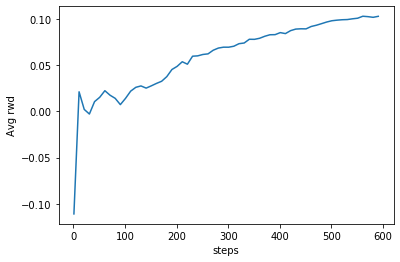

In [35]:
    
    #X_t = X_0 + v + delta_p + pi_t
    #Avrage Rwd vs Steps for epsilon hyper-parameter
    steps = [x for x in range(1,len(ep_rwds)+1, 10)]
    #print(steps)
    
    y = np.zeros(len(steps))
    x = steps[:]
    for i in range(0, len(y)):
        y[i] = np.sum(ep_rwds[:steps[i]])/(steps[i]*ue_tsteps)
    
    #print(x)
    #print(y)
    plt.plot(x,y)
    plt.xlabel('steps')
    plt.ylabel('Avg rwd')
        

In [8]:
    #Benchmark Models
    Exh_rates = []
    Los_rates = []
    for i in range(len(possible_ue_loc)):
        ue_t = possible_ue_loc[i][:]
        obs = agent.env.reset(ue_t)
        exh_rate = agent.env.get_Exh_Rate()
        los_rate = agent.env.get_LoS_Rate()
        print("ue: {0}, exh_rate: {1}, los_rate: {2}\n".format(ue_t,exh_rate, los_rate))
        Exh_rates.append(exh_rate)
        Los_rates.append(los_rate)

(9.637113047633726e-05-9.637113047633726e-05j)
ue: [20, 15, 0], exh_rate: 1.1354879397849063, los_rate: 1.1508323714036213

(7.184316365376065e-05-7.184316365376065e-05j)
ue: [30, 15, 0], exh_rate: 0.915922922569897, los_rate: 1.0898136315201208

(5.6391631510640875e-05-5.6391631510640875e-05j)
ue: [40, 15, 0], exh_rate: 0.8825198901551439, los_rate: 1.0395061776943124

(4.615183452021944e-05-4.615183452021944e-05j)
ue: [50, 15, 0], exh_rate: 0.8977384703896631, los_rate: 0.9978790807633523

(3.894934537684579e-05-3.894934537684579e-05j)
ue: [60, 15, 0], exh_rate: 0.9012929324532242, los_rate: 0.9626323007329801

(3.365338559531218e-05-3.365338559531218e-05j)
ue: [70, 15, 0], exh_rate: 0.9118665440419937, los_rate: 0.9322736018698763

(2.9599207862256096e-05-2.9599207862256096e-05j)
ue: [80, 15, 0], exh_rate: 0.7858029470322376, los_rate: 0.9056096447737837

(2.6407707706415666e-05-2.6407707706415666e-05j)
ue: [90, 15, 0], exh_rate: 0.8063050474351603, los_rate: 0.8819116725604583

(2.

Text(0, 0.5, 'Rate (Gbit/s)')

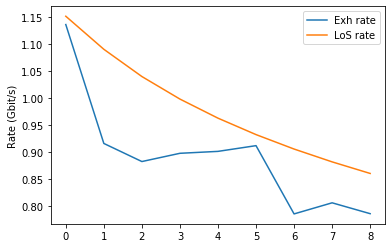

In [8]:
    fig = plt.figure()
    x_axis = list(range(len(possible_ue_loc)))
    plt.plot(x_axis, Exh_rates, x_axis, Los_rates)
    plt.legend(['Exh rate', 'LoS rate'])
    plt.ylabel('Rate (Gbit/s)')

In [21]:
    '''
    #testing Q-model, #X_t = X_(t-1) + delta_p
    #UE parameters
    corr_ue_loc = []
    learnt_rates = []
    for i in range(len(possible_ue_loc)):
        ue_t = possible_ue_loc[i][:]
        obs = agent.env.reset(ue_t) #ue_t sent to gnB1
        action, action_val = agent.Best_Action(obs) #gnB1 selects best action for given 'obs'
        corr_ue_loc.append([ue_t[0]+action[-1][0], ue_t[1], ue_t[2]])
        #print(action)
        next_obs, rwd = agent.env.step(action)
        rate = agent.env.get_Rate()
        learnt_rates.append(rate)
        print("ue_{0}: {1}, best_action_val: {2}, rwd: {3},  Learnt Rate: {4}".format(i+1, ue_t, action_val, rwd, rate))
 
    '''
    

'\n#testing Q-model, #X_t = X_(t-1) + delta_p\n#UE parameters\ncorr_ue_loc = []\nlearnt_rates = []\nfor i in range(len(possible_ue_loc)):\n    ue_t = possible_ue_loc[i][:]\n    obs = agent.env.reset(ue_t) #ue_t sent to gnB1\n    action, action_val = agent.Best_Action(obs) #gnB1 selects best action for given \'obs\'\n    corr_ue_loc.append([ue_t[0]+action[-1][0], ue_t[1], ue_t[2]])\n    #print(action)\n    next_obs, rwd = agent.env.step(action)\n    rate = agent.env.get_Rate()\n    learnt_rates.append(rate)\n    print("ue_{0}: {1}, best_action_val: {2}, rwd: {3},  Learnt Rate: {4}".format(i+1, ue_t, action_val, rwd, rate))\n \n'

In [40]:
    #X_t = X_0 + v + delta_p + pi_t
    corr_ue_loc = []
    learnt_rates = []
    obs = agent.env.reset(ue_s) #ue_t sent to gnB1
    for i in range(ue_tsteps):
        ue_t = possible_ue_loc[i]
        action, action_val = agent.Best_Action(obs) #gnB1 selects best action for given 'obs'
        corr_ue_loc.append([ue_t[0]+action[-1][0], ue_t[1], ue_t[2]])
        #print(action)
        next_obs, rwd = agent.env.step(action)
        rate = agent.env.get_Rate()
        learnt_rates.append(rate)
        print("ue_{0}: {1}, best_action_val: {2}, rwd: {3},  Learnt Rate: {4}".format(i+1, ue_t, action_val, rwd, rate))
 

[RF_Env] SNR: 80.88798130121961, rate: 0.9641195050217126
ue_1: [20, 15, 0], best_action_val: 2.136289044115516, rwd: 1,  Learnt Rate: 0.9641195050217126
[RF_Env] SNR: 69.43057034955892, rate: 0.8275833345309374
ue_2: [30, 15, 0], best_action_val: 1.2142323472878003, rwd: 1,  Learnt Rate: 0.8275833345309374
[RF_Env] SNR: 69.10585020625666, rate: 0.8237143009334575
ue_3: [40, 15, 0], best_action_val: 0.3863011933970131, rwd: 1,  Learnt Rate: 0.8237143009334575
[RF_Env] SNR: 57.35077304530124, rate: 0.6837086912520702
ue_4: [50, 15, 0], best_action_val: -0.030226935769616856, rwd: -0.1,  Learnt Rate: 0.6837086912520702
[RF_Env] SNR: 50.05542341088071, rate: 0.5969392874731247
ue_5: [60, 15, 0], best_action_val: -0.1266986886476142, rwd: -0.1,  Learnt Rate: 0.5969392874731247
[RF_Env] SNR: 35.10848529405223, rate: 0.42026315651746676
ue_6: [70, 15, 0], best_action_val: -0.0033424571060898106, rwd: -0.1,  Learnt Rate: 0.42026315651746676
[RF_Env] SNR: 44.73806202147787, rate: 0.53383472262

[0.9641195050217126, 0.8275833345309374, 0.8237143009334575, 0.6837086912520702, 0.5969392874731247, 0.42026315651746676, 0.5338347226227154, 0.3749419742076756, 0.11737092778338044]


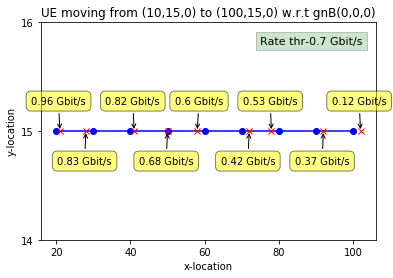

In [43]:
    #Plot between estimated and corrected positions with rate
    print(learnt_rates)
    fig=plt.figure()
    #x_axis = [x+1 for x in range(len(possible_ue_loc))]
    y_axis = [int(x[1]) for x in possible_ue_loc]
    #y_axis = [possible_ue_loc[0][1]] + y_axis
    
    x1 = [x[0] for x in possible_ue_loc] 
    plt.plot(x1, y_axis, 'bo-')
    
    x2 = [x[0] for x in corr_ue_loc]
    plt.plot(x2, y_axis, 'rx')
    plt.xlabel('x-location')
    plt.ylabel('y-location')
    plt.title('UE moving from (10,15,0) to (100,15,0) w.r.t gnB(0,0,0)')
    plt.yticks([14,15,16])
    
    plt.text(x2[-4]+3, y_axis[-1]+0.8, 'Rate thr-{0} Gbit/s'.format(rate_thr), fontsize=11, bbox=dict(facecolor='green', alpha=0.2))#color='green')
    for i in range(len(learnt_rates)):
        x,y = x2[i], y_axis[i]
        if (i % 2 == 0):
            plt.annotate(str(np.round(learnt_rates[i],2))+' Gbit/s',xy=(x, y), xytext=(26, 25),textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5), arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        else:
            plt.annotate(str(np.round(learnt_rates[i],2))+' Gbit/s',xy=(x, y), xytext=(26, -25),textcoords='offset points', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5), arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            
    #plt.grid()
    plt.show()

[0.9641195050217126, 0.8275833345309374, 0.8237143009334575, 0.6837086912520702, 0.5969392874731247, 0.42026315651746676, 0.5338347226227154, 0.3749419742076756, 0.11737092778338044]
[1.1354879397849063, 0.915922922569897, 0.8825198901551439, 0.8977384703896631, 0.9012929324532242, 0.9118665440419937, 0.7858029470322376, 0.8063050474351603, 0.7862494754733391]


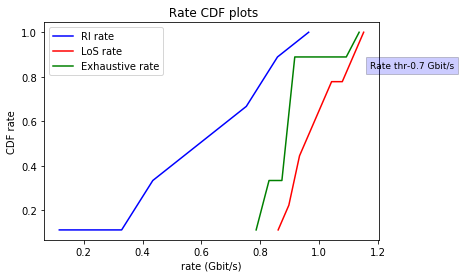

In [42]:
    print(learnt_rates)
    print(Exh_rates)
    fig=plt.figure()
    #Los_rate and learnt_rates CDF distribution
    #x1 = np.sort(learnt_rates)
    #y1 = np.arange(len(x1))/float(len(x1))
    x1,y1 = E_CDF(learnt_rates)
    
    #x3 = np.sort(Exh_rates)
    #y3 = np.arange(len(x3))/float(len(x3))
    x3,y3 = E_CDF(Exh_rates)
    x2,y2 = E_CDF(Los_rates)
    plt.plot(x1,y1, 'b-', x2,y2, 'r-', x3,y3, 'g-')
    plt.legend(["Rl rate", "LoS rate", "Exhaustive rate"])
    plt.title(" Rate CDF plots")
    plt.text(x3[-2]+0.08, y3[-2]-0.05, 'Rate thr-{0} Gbit/s'.format(rate_thr), fontsize=9, bbox=dict(facecolor='blue', alpha=0.2))
    
    plt.xlabel('rate (Gbit/s)')
    plt.ylabel('CDF rate')
    plt.show()

In [224]:
    '''
    fig=plt.figure()
    #Los_rate and learnt_rates CDF distribution
    #x1 = np.sort(learnt_rates)
    #y1 = np.arange(len(x1))/float(len(x1))
    #plt.plot(x1, y1, 'b-')
    #plt.legend("RL rates")
    
    #x2 = np.sort(Los_rates)
    #y2 = np.arange(len(x2))/float(len(x2))
    x1,y1 = E_CDF(learnt_rates)
    x2,y2 = E_CDF(Los_rates)
    plt.plot(x1,y1, 'b-', x2, y2, 'r-')
    plt.legend(["Rl rate", "LoS rate"])
    plt.title("Drone RL vs LoS CDF plots")
    plt.text(x2[4], y2[-1]-0.03, 'Rate thr-{0} Gbit/s'.format(rate_thr), fontsize=9, bbox=dict(facecolor='green', alpha=0.2))
    
    plt.xlabel('rate (Gbit/s)')
    plt.ylabel('CDF rate')
    plt.show()
    '''

'\nfig=plt.figure()\n#Los_rate and learnt_rates CDF distribution\n#x1 = np.sort(learnt_rates)\n#y1 = np.arange(len(x1))/float(len(x1))\n#plt.plot(x1, y1, \'b-\')\n#plt.legend("RL rates")\n\n#x2 = np.sort(Los_rates)\n#y2 = np.arange(len(x2))/float(len(x2))\nx1,y1 = E_CDF(learnt_rates)\nx2,y2 = E_CDF(Los_rates)\nplt.plot(x1,y1, \'b-\', x2, y2, \'r-\')\nplt.legend(["Rl rate", "LoS rate"])\nplt.title("Drone RL vs LoS CDF plots")\nplt.text(x2[4], y2[-1]-0.03, \'Rate thr-{0} Gbit/s\'.format(rate_thr), fontsize=9, bbox=dict(facecolor=\'green\', alpha=0.2))\n\nplt.xlabel(\'rate (Gbit/s)\')\nplt.ylabel(\'CDF rate\')\nplt.show()\n'

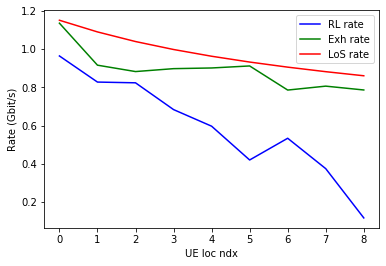

In [41]:
    fig=plt.figure()
    x = list(range(len(learnt_rates)))
    plt.plot(x, learnt_rates,'b', x, Exh_rates, 'g', x, Los_rates, 'r')
    plt.legend(["RL rate", "Exh rate", "LoS rate"])
    plt.ylabel('Rate (Gbit/s)')
    plt.xlabel('UE loc ndx')
    plt.show()